# Replicar el curso Platzi, análisis exploratorio de datos, conociendo datos de pingüinos

## Instalar lirbrerías necesarias

In [ ]:
# crear ambiente para analisis de datos
!conda create -n data_analisis

# activar ambiente creado
!conda activate data_analisis

# instalar librerias con pip
!pip install palmerpenguins numpy pandas seaborn matplotlib empiricaldist statsmodels sklearn pyjanitor

## Importar librerías

In [158]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss


## Establecer apariencia general de los gráficos

In [67]:
%matplotlib inline
sns.set_style(style ='whitegrid')
sns.set_context(context= 'notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie':'#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

## Cargar los datos

### Utilizando el paquete palmerpenguis

#### Datos crudos

In [5]:
raw_penguins_df = palmerpenguins.load_penguins_raw()
raw_penguins_df.head()


,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


#### Datos previamente procesados

In [6]:
preprocess_penguins_df = palmerpenguins.load_penguins()
preprocess_penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


## Colecta y validación de datos

### ¿Qué tipo de dato son las variables del conjunto de datos?

In [7]:
preprocess_penguins_df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

### ¿Cuántas variables de cada tipo de dato tenemos en el conjunto de datos?

In [8]:
(
    preprocess_penguins_df
    .dtypes
    .value_counts()
)

float64    4
object     3
int64      1
Name: count, dtype: int64

### ¿Cuántas variables y observaciones tenemos en el conjunto de datos?

In [9]:
preprocess_penguins_df.shape

(344, 8)

### ¿Existen valores nulos explícitos en el conjunto de datos?

In [10]:
(
    preprocess_penguins_df
    .isnull()
    .any()
)

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
year                 False
dtype: bool

### De tener observaciones con valores nulos, ¿Cuántas tenemos por cada variable?

In [ ]:
(
    preprocess_penguins_df
    .isnull()
    .sum()
)

### ¿Cuántos valores nulos tenemos en total en el conjunto de datos?

In [ ]:
(
    preprocess_penguins_df
    .isnull()
    .sum()
    .sum()
)

### ¿Cuál es la proporción de valores nulos por cada variable?

In [ ]:
(
    preprocess_penguins_df
    .isnull()
    .melt()
    .pipe(
        lambda df:(
            sns.displot(
                data=df.rename(columns={'variable': 'Variable', 'value':'Faltante'}),
                y='Variable',
                hue='Faltante',
                multiple='fill',
                aspect=2.0,
            )
        )
    )
)

### ¿Cómo podemos visualizar los valores nulos en todo el conjunto de datos?

In [ ]:
(
    preprocess_penguins_df
    .isnull()
    .transpose()
    .pipe(
        lambda df:(
            sns.heatmap(
                data=df        
            )
        )
    )
)

### ¿Cuántas observaciones perdemos si eliminamos los datos faltantes?

In [13]:
print('La matriz es de '+ str(preprocess_penguins_df.shape) + ' antes de eliminar los valores nulos')

processed_penguins_df = (
    preprocess_penguins_df
    .dropna()
)

print('La matriz es de '+ str(processed_penguins_df.shape) + ' después de eliminar los valores nulos')
print('Se están eliminando: '+ str(preprocess_penguins_df.shape[0] - processed_penguins_df.shape[0]) +' filas o registros')

La matriz es de (344, 8) antes de eliminar los valores nulos
La matriz es de (333, 8) después de eliminar los valores nulos
Se están eliminando: 11 filas o registros


## Conteos y proporciones

### ¿Qué estadísticos describen el conjunto de datos?

#### Todas las variables

In [14]:
processed_penguins_df.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,333,333,333.000000,333.000000,333.000000,333.000000,333,333.000000
unique,3,3,NaN,NaN,NaN,NaN,2,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,146,163,NaN,NaN,NaN,NaN,168,NaN
mean,NaN,NaN,43.992793,17.164865,200.966967,4207.057057,NaN,2008.042042
std,NaN,NaN,5.468668,1.969235,14.015765,805.215802,NaN,0.812944
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,NaN,NaN,39.500000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,NaN,NaN,44.500000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,NaN,NaN,48.600000,18.700000,213.000000,4775.000000,NaN,2009.000000


#### Solo las numéricas

In [ ]:
processed_penguins_df.describe(include=[np.number])

#### Solo categóricas
En este caso se confía en que los datos tipo object son categorías, sin embargo es necesario validarlo previamente

In [ ]:
processed_penguins_df.describe(include=object)

#### Solo categóricas
Se puede fijar que las variables tipo object sean categóricas haciendo lo siguiente

In [ ]:
(
    processed_penguins_df
    .astype({
        'species': 'category',
        'island': 'category',
        'sex': 'category'
    })
    .describe(include='category')
)

### ¿Cómo visualizar los conteos?

#### Pandas

In [ ]:
(
    processed_penguins_df
    .species
    .value_counts()
    .plot(
        kind='bar'
    )
)

#### Seaborn

In [ ]:
sns.catplot(
    data=processed_penguins_df,
    x='species',
    kind='count',
    palette=penguin_color
)

### ¿Cómo visualizar proporciones?

In [ ]:
(
    processed_penguins_df
    .assign(x='')
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x='x',
                hue='species',
                multiple='fill',
                palette=penguin_color
            )
        )
    )
)

## Medidas de dispersión

### ¿Cuál es el valor máximo de las variables?


In [16]:
processed_penguins_df.max(numeric_only=True)

bill_length_mm         59.6
bill_depth_mm          21.5
flipper_length_mm     231.0
body_mass_g          6300.0
year                 2009.0
dtype: float64

### ¿Cuál es el valor mínimo de las variables?

In [17]:
processed_penguins_df.min(numeric_only=True)

bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
year                 2007.0
dtype: float64

### ¿Cuál es el rango de las variables?

In [18]:
processed_penguins_df.max(numeric_only=True) - processed_penguins_df.min(numeric_only=True)

bill_length_mm         27.5
bill_depth_mm           8.4
flipper_length_mm      59.0
body_mass_g          3600.0
year                    2.0
dtype: float64

### ¿Cuál es la desviación estándar de las variables?

In [20]:
processed_penguins_df.std(numeric_only=True)

bill_length_mm         5.468668
bill_depth_mm          1.969235
flipper_length_mm     14.015765
body_mass_g          805.215802
year                   0.812944
dtype: float64

### ¿Cuál es el rango intercuartílico?

In [23]:
processed_penguins_df.quantile(0.75, numeric_only=True)

bill_length_mm         44.5
bill_depth_mm          17.3
flipper_length_mm     197.0
body_mass_g          4050.0
year                 2008.0
Name: 0.5, dtype: float64

In [26]:
processed_penguins_df.quantile(0.75, numeric_only=True) - processed_penguins_df.quantile(0.25, numeric_only=True)

bill_length_mm          9.1
bill_depth_mm           3.1
flipper_length_mm      23.0
body_mass_g          1225.0
year                    2.0
dtype: float64

In [31]:
(
    processed_penguins_df
    .quantile(q=[0.75, 0.5, 0.25], numeric_only=True)
    .transpose()
    .rename_axis('variable')
    .reset_index()
    .assign(
        iqr=lambda df: df[0.75] - df[0.25]
    )
)


,variable,0.75,0.5,0.25,iqr
0,bill_length_mm,48.6,44.5,39.5,9.1
1,bill_depth_mm,18.7,17.3,15.6,3.1
2,flipper_length_mm,213.0,197.0,190.0,23.0
3,body_mass_g,4775.0,4050.0,3550.0,1225.0
4,year,2009.0,2008.0,2007.0,2.0


### ¿Cómo puedo visualizar la distribución de una variable?

#### Histograma

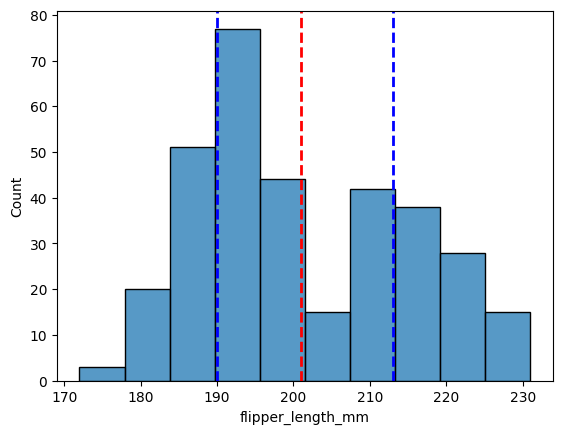

In [40]:
sns.histplot(
    data=processed_penguins_df,
    x = 'flipper_length_mm'
)
plt.axvline(
    x=processed_penguins_df.flipper_length_mm.mean(),
    color = 'red',
    linestyle='dashed',
    linewidth= 2
)
plt.axvline(
    x=processed_penguins_df.flipper_length_mm.quantile(0.25),
    color = 'blue',
    linestyle='dashed',
    linewidth= 2
)
plt.axvline(
    x=processed_penguins_df.flipper_length_mm.quantile(0.75),
    color = 'blue',
    linestyle='dashed',
    linewidth= 2
)

#### Diagrama de cajas / boxplot

<Axes: xlabel='flipper_length_mm'>

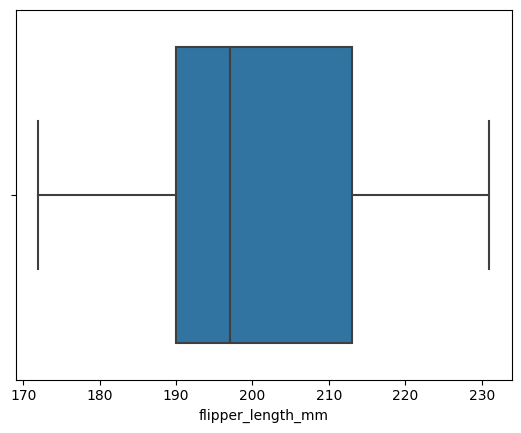

In [41]:
sns.boxplot(
    data= processed_penguins_df,
    x='flipper_length_mm'
)

## Distribuciones: PMFs, CDFs, PDFs

### Funciones de probabilidad de masas (PMFs)

#### Utlizando seaborn

<Axes: xlabel='flipper_length_mm', ylabel='Probability'>

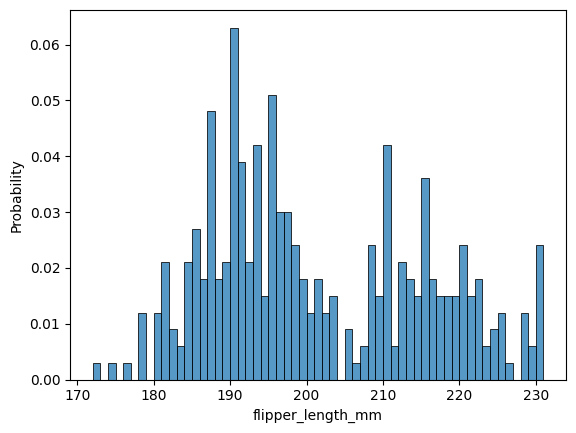

In [45]:
sns.histplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    binwidth=1,
    stat='probability'
)

#### Utilizando empiricaldist

In [48]:
pmf_flipper_length_mm = empiricaldist.Pmf.from_seq(
    preprocess_penguins_df.flipper_length_mm,
    normalize = True
)

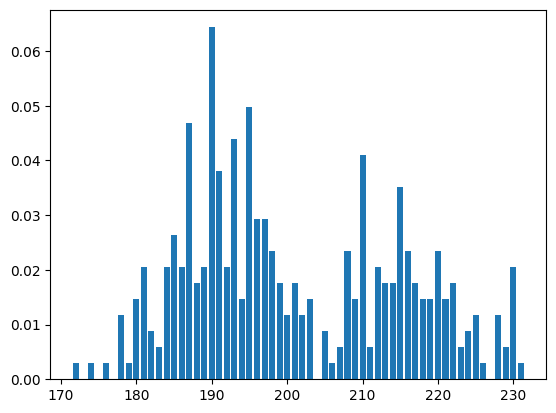

In [49]:
pmf_flipper_length_mm.bar()

In [51]:
# ¿cual es la probabilidad de que un pinguino tenga una longitud de ala de 190?
pmf_flipper_length_mm(190)

0.06432748538011696

### Funciones empíricas de probabilidad acumulada (ECDFs)

#### Utilizando seaborn

<Axes: xlabel='flipper_length_mm', ylabel='Proportion'>

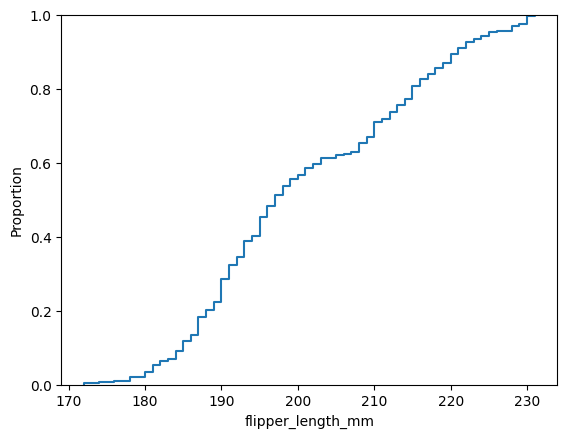

In [52]:
# ¿Cual es la probabilidad de tener un pinguino con longitud de ala de 170 o menos?
sns.ecdfplot(
    data=processed_penguins_df,
    x='flipper_length_mm'
)

#### Utilizando empiricaldist

In [54]:
cdf_flipper_length_mm = empiricaldist.Cdf.from_seq(
    processed_penguins_df.flipper_length_mm,
    normalize=True
)

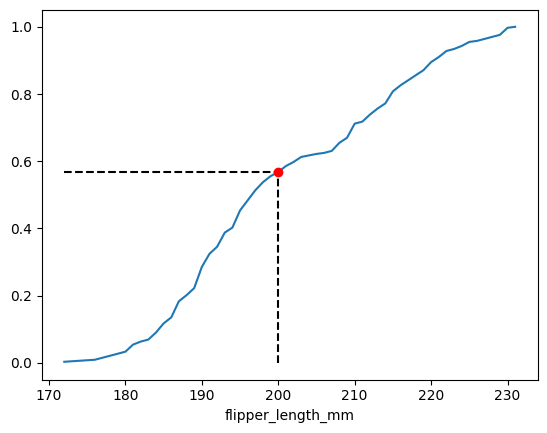

In [60]:
cdf_flipper_length_mm.plot()

# ¿Cual es la probabilidad de tener un pinguino con longitud de ala de 200 o menos?
q = 200
p = cdf_flipper_length_mm.forward(q)

plt.vlines(
    x = q,
    ymin=0,
    ymax=p,
    color='black',
    linestyle='dashed'
)

plt.hlines(
    y = p,
    xmin=pmf_flipper_length_mm.qs[0],
    xmax=q,
    color='black',
    linestyle='dashed'
)

plt.plot(q,p, 'ro')

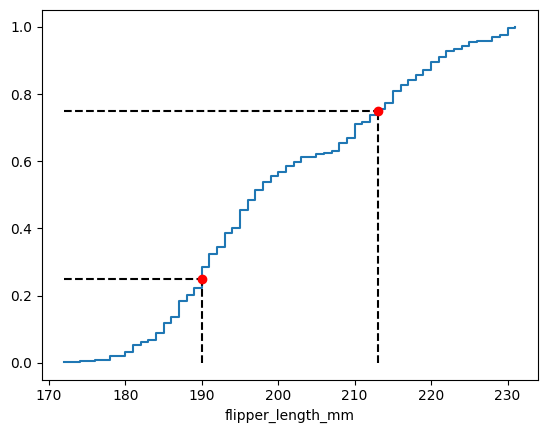

In [64]:
cdf_flipper_length_mm.step()
p_1 = 0.25 # probabilidad especifica
p_2 = 0.75

ps = (0.25, 0.75) #Rango Intercuartilico IQR
qs= cdf_flipper_length_mm.inverse(ps)

plt.vlines(
    x = qs,
    ymin=0,
    ymax=ps,
    color='black',
    linestyle='dashed'
)

plt.hlines(
    y = ps,
    xmin=pmf_flipper_length_mm.qs[0],
    xmax=qs,
    color='black',
    linestyle='dashed'
)

plt.scatter(
    x = qs,
    y=ps,
    color='red',
    zorder=2
)

#### Comparando distribuciones

<Axes: xlabel='flipper_length_mm', ylabel='Proportion'>

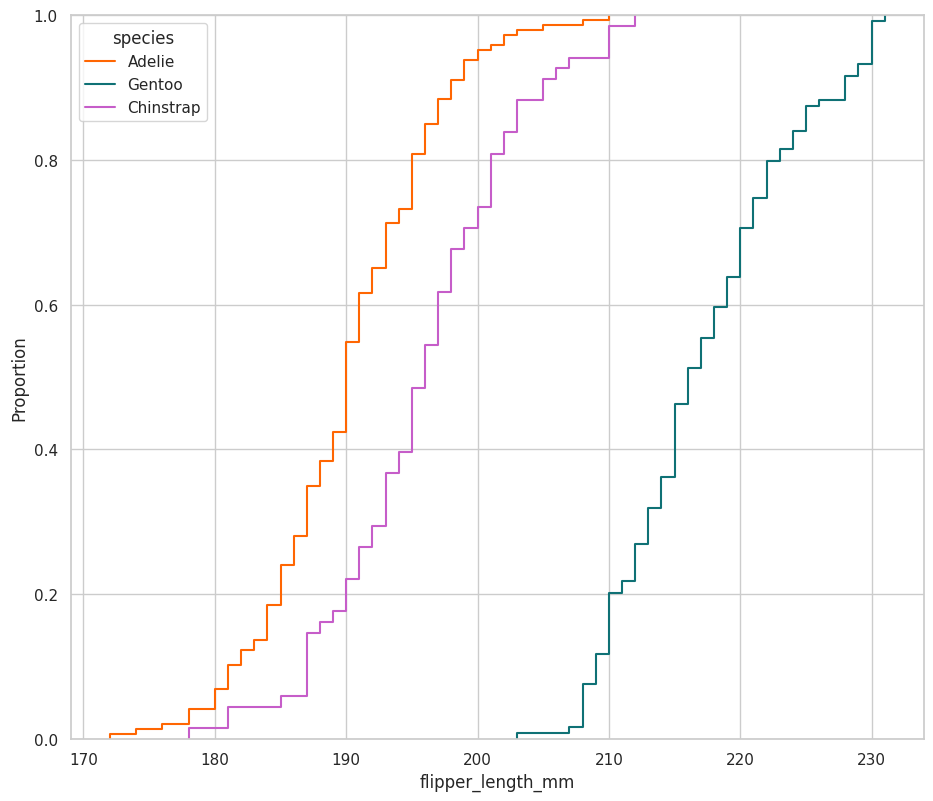

In [68]:
sns.ecdfplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    hue='species',
    palette=penguin_color
)

### Funciones de densidad de probabilidad

<Axes: xlabel='flipper_length_mm', ylabel='Density'>

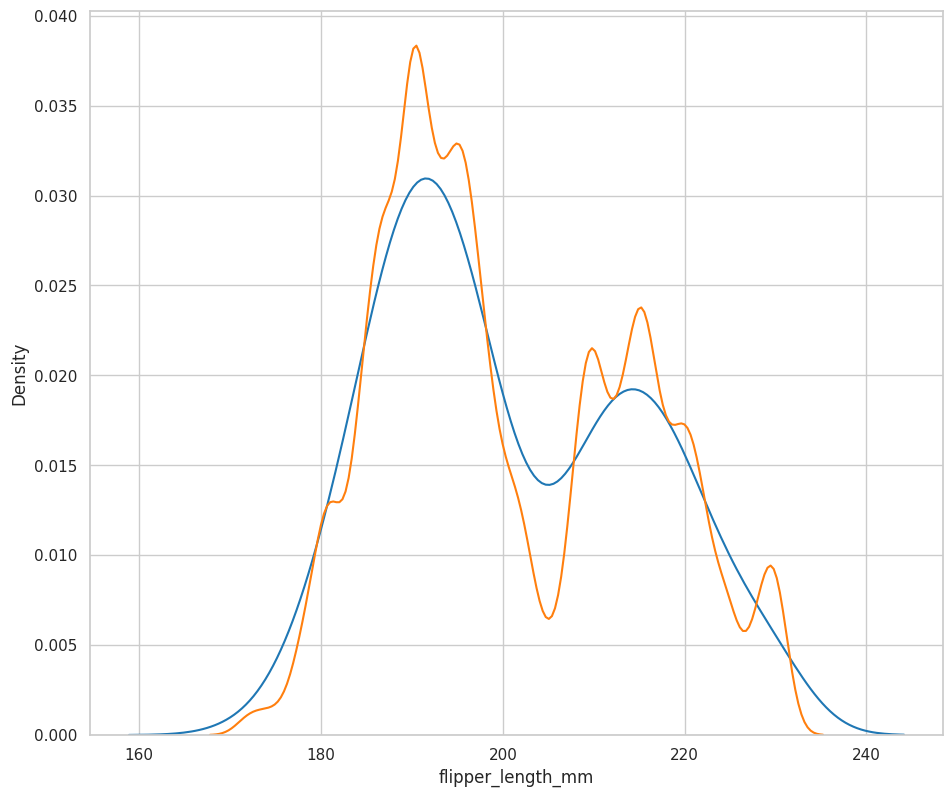

In [70]:
sns.kdeplot(
    data= preprocess_penguins_df,
    x = 'flipper_length_mm'
)

sns.kdeplot(
    data= preprocess_penguins_df,
    x = 'flipper_length_mm',
    bw_method=0.1
)

In [72]:
stats = processed_penguins_df.body_mass_g.describe()
stats

count     333.000000
mean     4207.057057
std       805.215802
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4775.000000
max      6300.000000
Name: body_mass_g, dtype: float64

<Axes: xlabel='body_mass_g'>

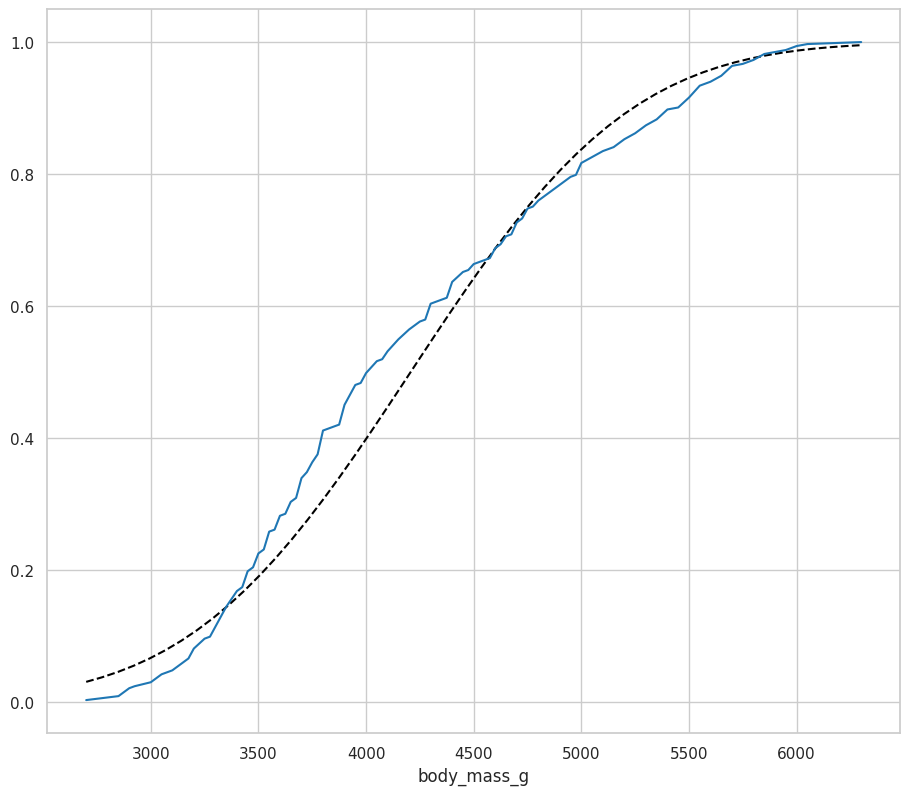

In [79]:
# ¿Mis datos siguen una distribucion normal?
xs = np.linspace(stats['min'], stats['max'] ) # vector x con valores minimo y maximo de mis datos
ys = scipy.stats.norm(stats['mean'], stats['std']).cdf(xs) # funcion de probabilidad acumulada si fuera una distribucion normal

plt.plot(xs, ys, color='black', linestyle='dashed') # grafica si mis datos siguen una distriucion normal

empiricaldist.Cdf.from_seq(
    processed_penguins_df.body_mass_g,
    normalize=True
).plot() # grafica de probabilidad acumulada de mis datos

<Axes: xlabel='body_mass_g', ylabel='Density'>

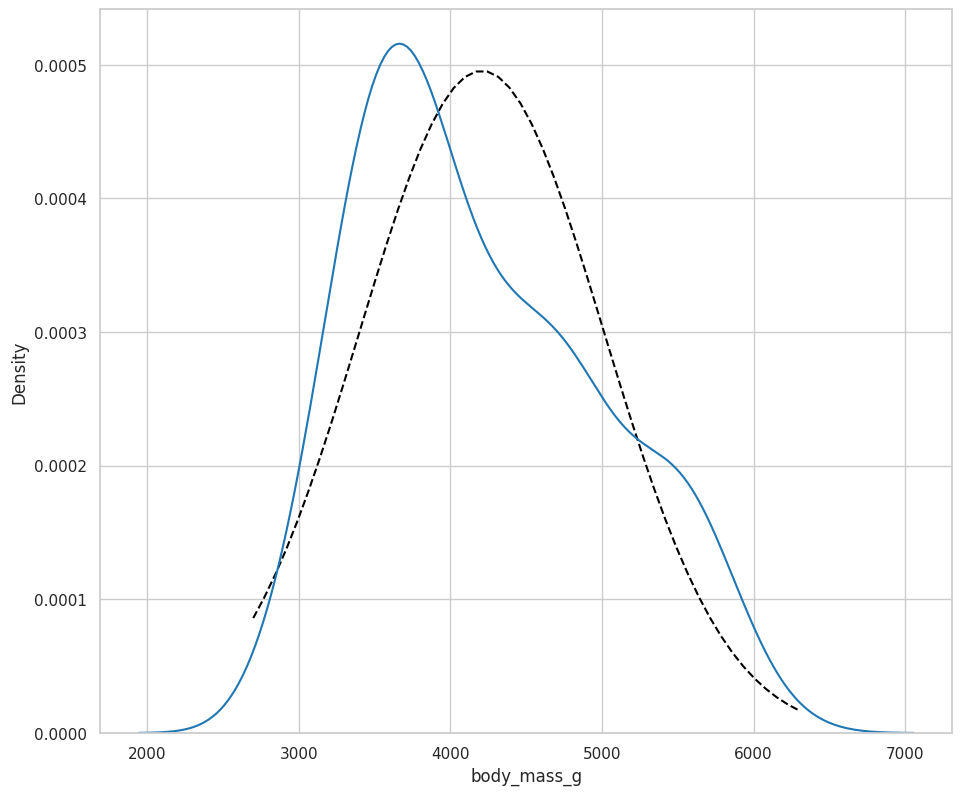

In [81]:
# ¿Mis datos siguen una distribucion normal?
xs = np.linspace(stats['min'], stats['max'] )
ys = scipy.stats.norm(stats['mean'], stats['std']).pdf(xs) #funcion de densidad de probabilidad si mis datos siguieran una distribucion normal

plt.plot(xs, ys, color='black', linestyle='dashed')

sns.kdeplot(
    data= processed_penguins_df,
    x = 'body_mass_g'
)

## Ley de los Grandes Números y Teorema del Límite Central

### Ley de los Grandes Números
A medida que el tamaño de la muestra aumenta la probabilidad se acerca a la probabildad teórica

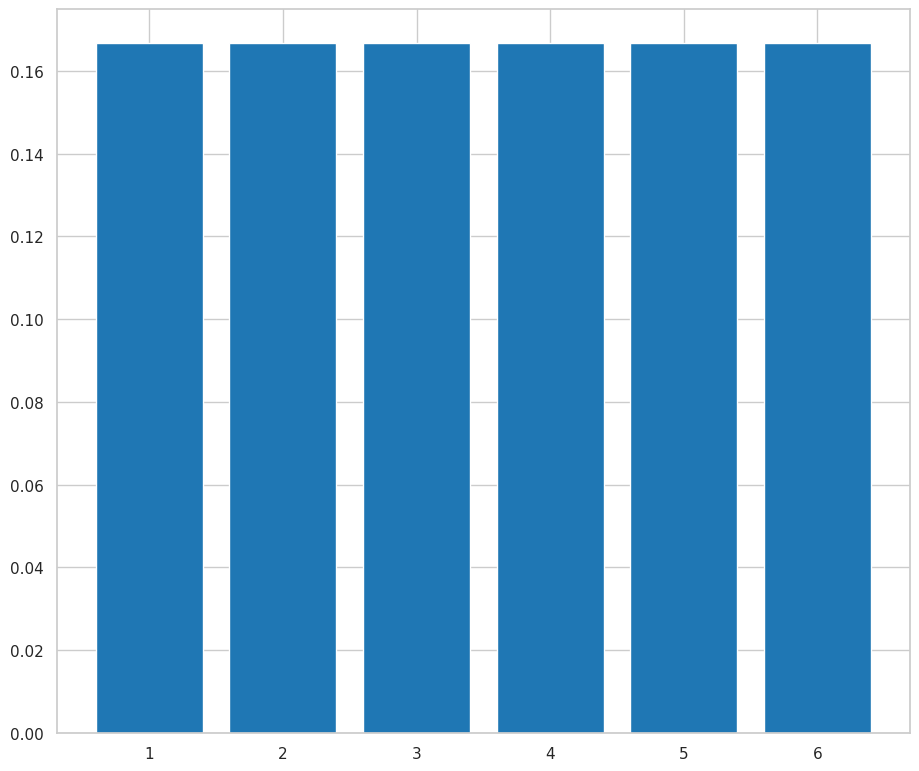

In [82]:
dado = empiricaldist.Pmf.from_seq([1,2,3,4,5,6])
dado.bar()

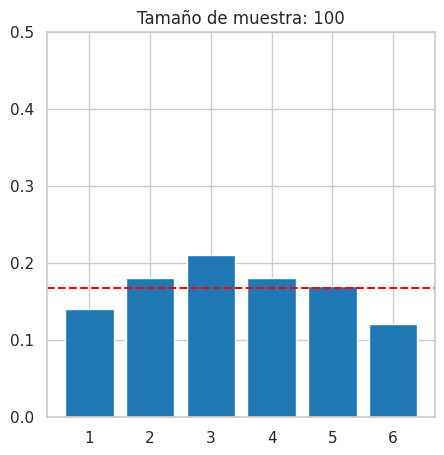

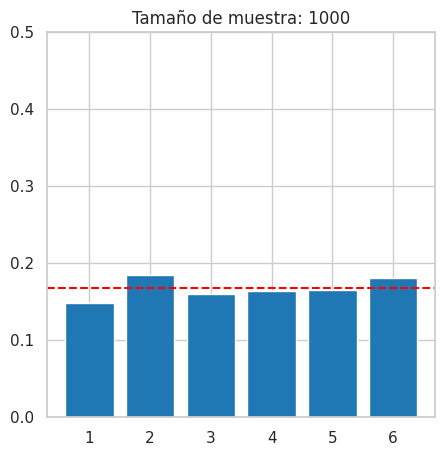

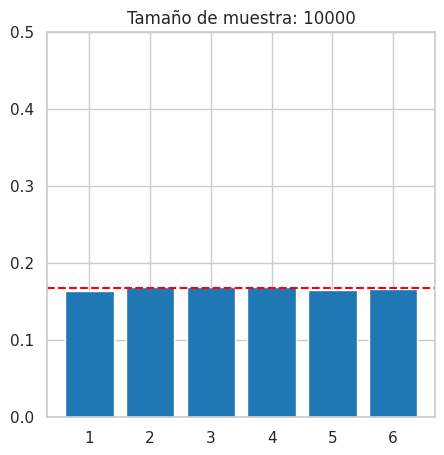

In [89]:
for tamano_muestra in (1e2, 1e3, 1e4):
    tamano_muestra = int(tamano_muestra)
    valores = dado.sample(tamano_muestra)
    muestra_pmf = empiricaldist.Pmf.from_seq(valores)
    
    plt.figure(figsize=(5,5))
    muestra_pmf.bar()
    plt.axhline(y= 1/6, color= 'red', linestyle='dashed')
    plt.ylim([0, 0.5])
    plt.title(f'Tamaño de muestra: {tamano_muestra}')
    

### Teorema del Límite Central


In [93]:
processed_penguins_df.sex.value_counts(normalize=True)

sex
male      0.504505
female    0.495495
Name: proportion, dtype: float64

In [94]:
sex_mumeric = processed_penguins_df.sex.replace(['male', 'female'], [1 , 0])

In [98]:
number_samples = 1000
sample_size = 35

samples_df = pd.DataFrame()
    
np.random.seed(42)
for i in range(1, number_samples + 1):
    sex_mumeric_sample = sex_mumeric.sample(sample_size, replace=True).to_numpy()
    sample_name = f'sample {i}'
    samples_df[sample_name] = sex_mumeric_sample

male_population_mean = samples_df.mean().mean()
print(f'Porcentaje estimado de pinguino machos es: {male_population_mean *100: 4f}%')


/tmp/ipykernel_357/2051578662.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  samples_df[sample_name] = sex_mumeric_sample
/tmp/ipykernel_357/2051578662.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  samples_df[sample_name] = sex_mumeric_sample
/tmp/ipykernel_357/2051578662.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented f

Porcentaje estimado de pinguino machos es:  50.182857%


## Análisis bivariado: Estableciendo relaciones - Gráfica de puntos

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

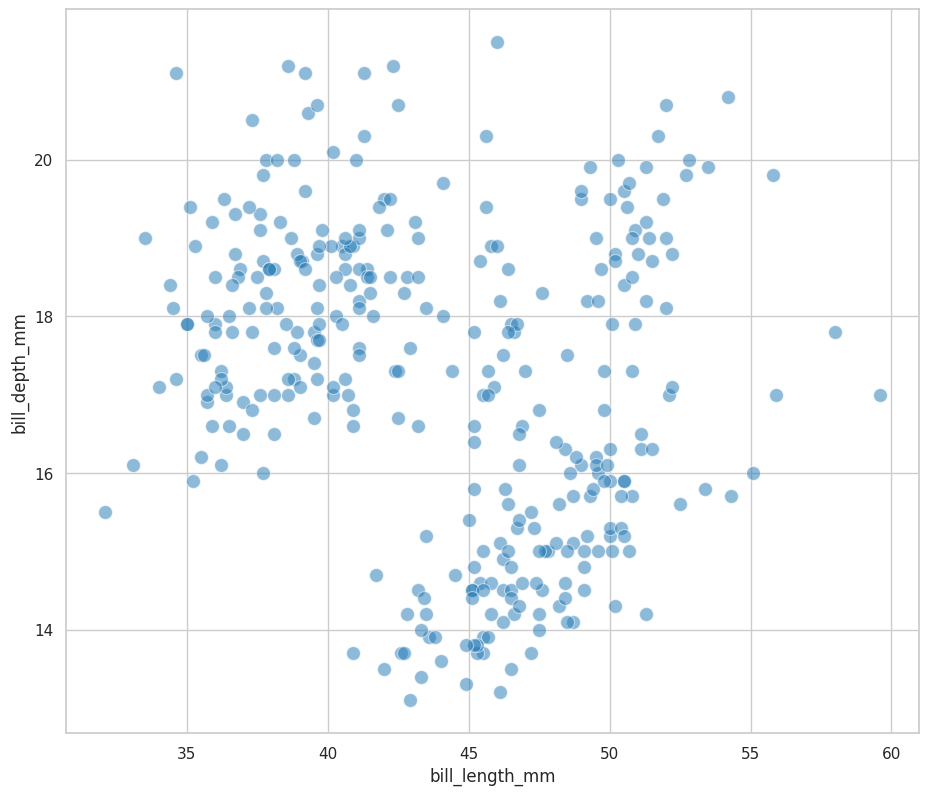

In [103]:
sns.scatterplot(
    data = processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    alpha=1/2,
    s=100
)

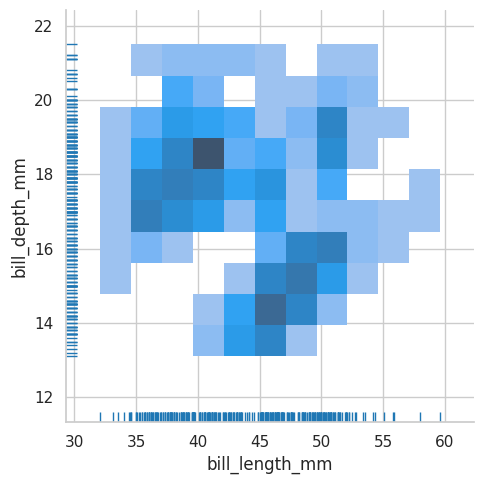

In [105]:
sns.displot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    rug=True
)

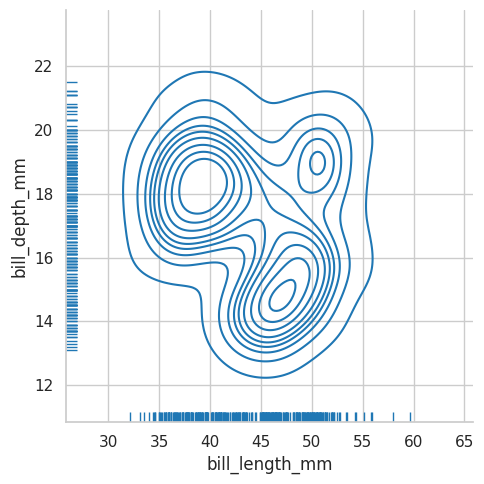

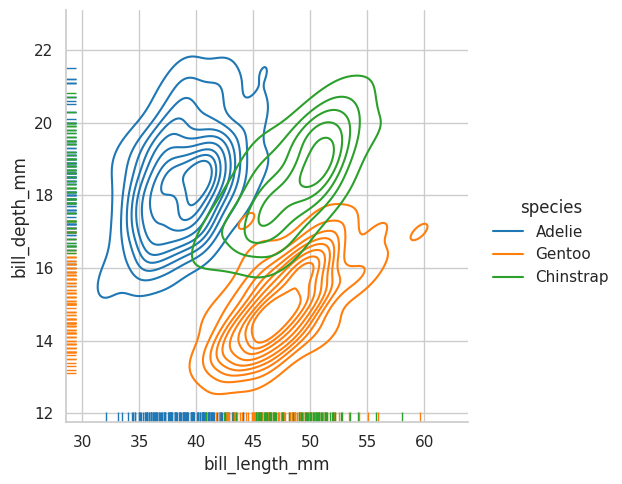

In [110]:
sns.displot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    rug=True,
    kind='kde'
)

sns.displot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    rug=True,
    kind='kde',
    hue='species'
)

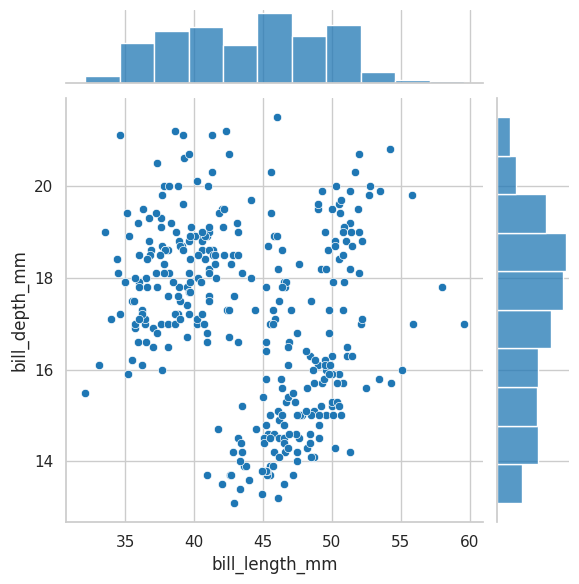

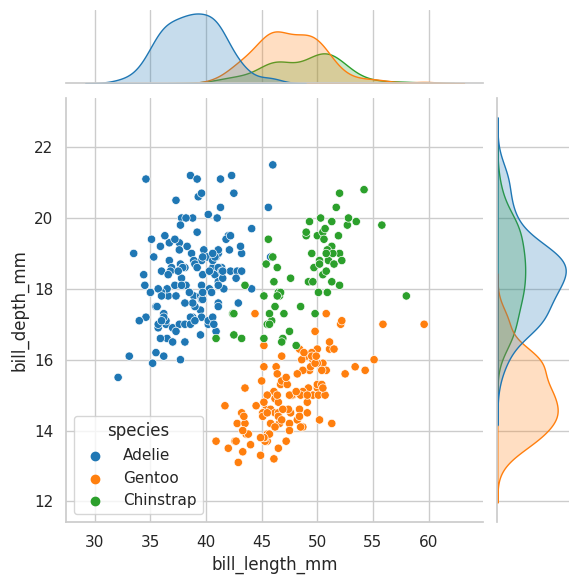

In [111]:
sns.jointplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm'
)

sns.jointplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='species'
)

## Análisis bivariado: Estableciendo relaciones - Gráficos d violín y boxplots

<Axes: xlabel='species', ylabel='flipper_length_mm'>

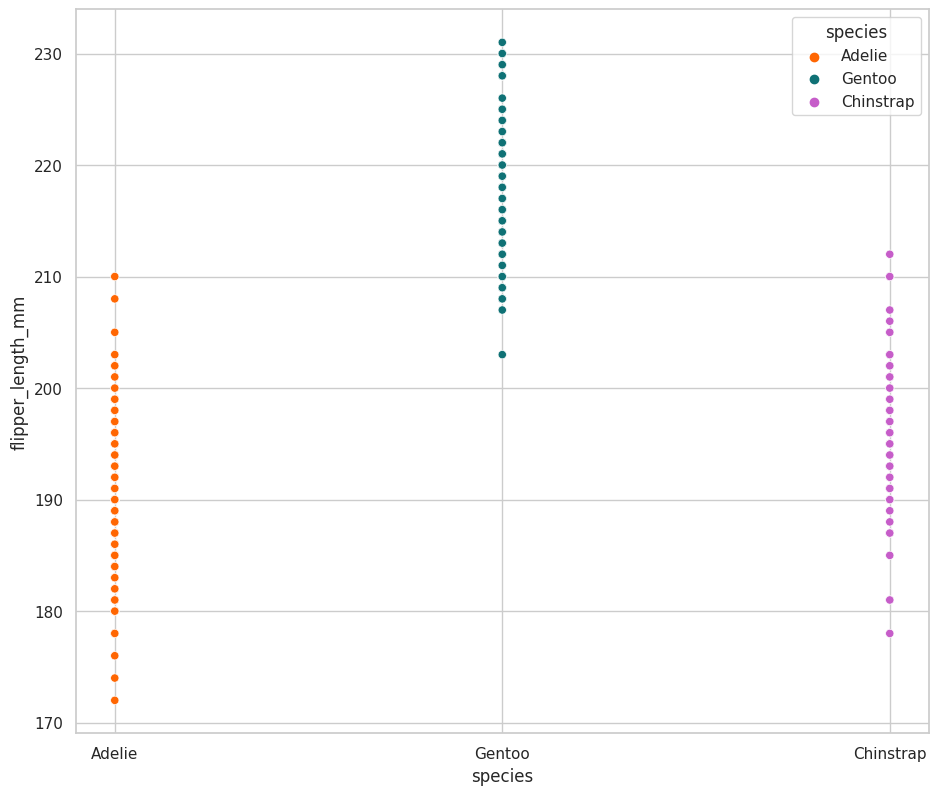

In [115]:
sns.scatterplot(
    data = processed_penguins_df,
    x='species', #variable discreta
    y='flipper_length_mm', #variable continua,
    hue='species',
    palette=penguin_color
)

/tmp/ipykernel_357/1937454629.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(


<Axes: xlabel='species', ylabel='flipper_length_mm'>

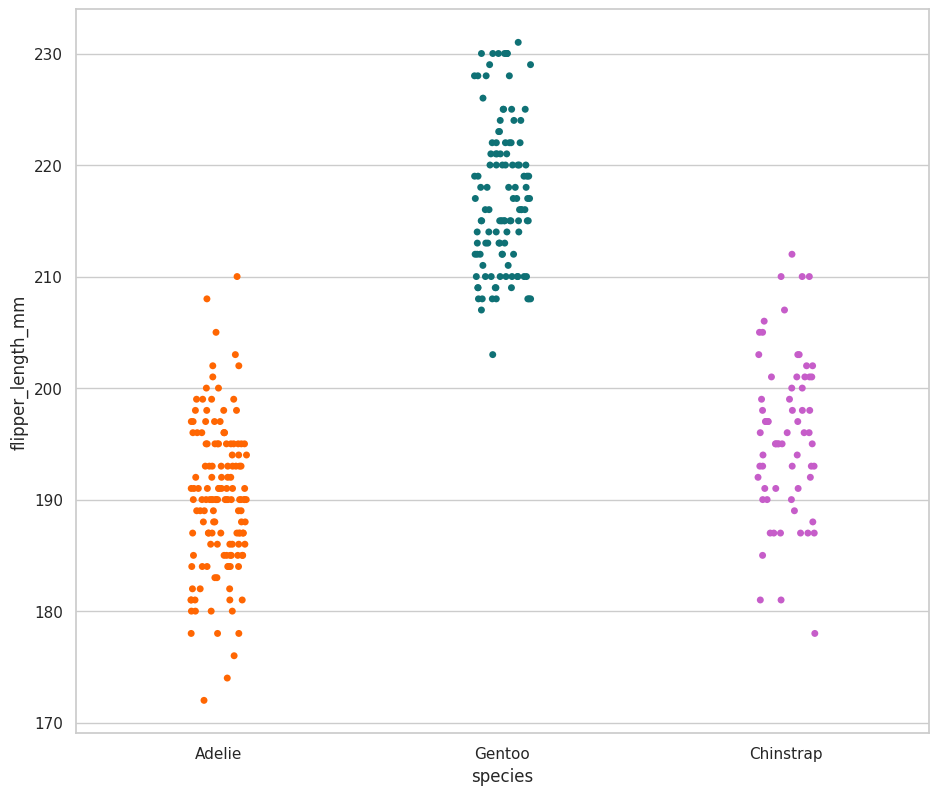

In [116]:
sns.stripplot(
    data = processed_penguins_df,
    x='species', #variable discreta
    y='flipper_length_mm', #variable continua,
    palette=penguin_color
)

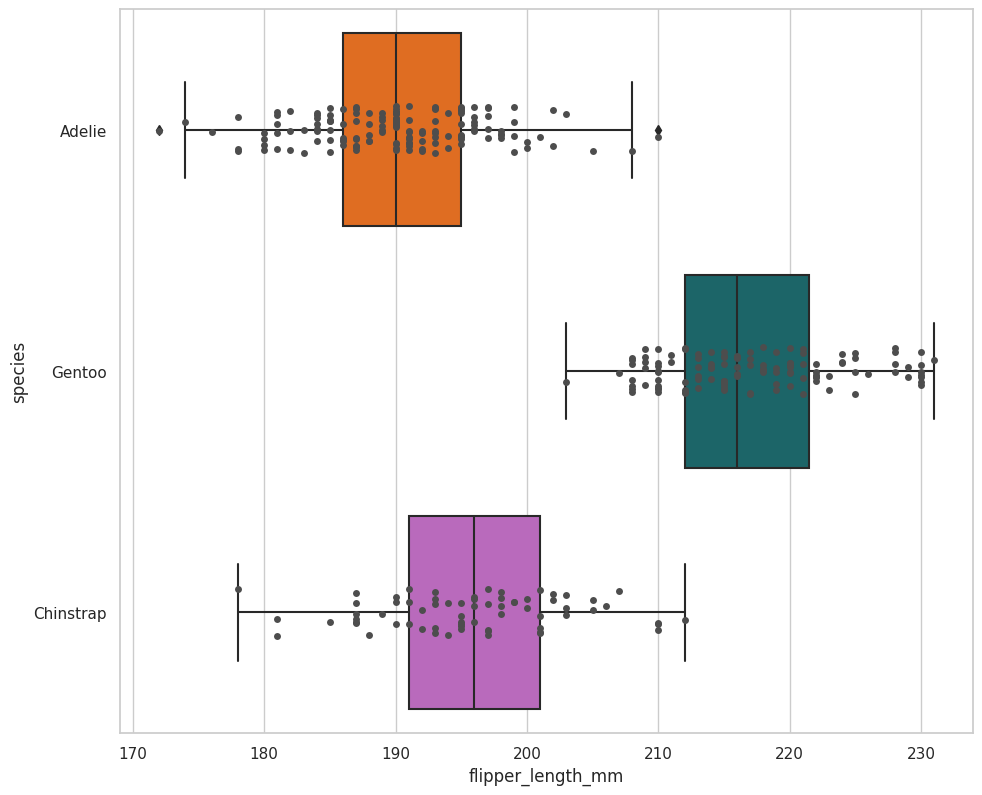

In [119]:
ax = sns.boxplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    y='species',
    palette=penguin_color
)
ax = sns.stripplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    y='species',
    color='.3'
)


/tmp/ipykernel_357/928321873.py:8: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.stripplot(


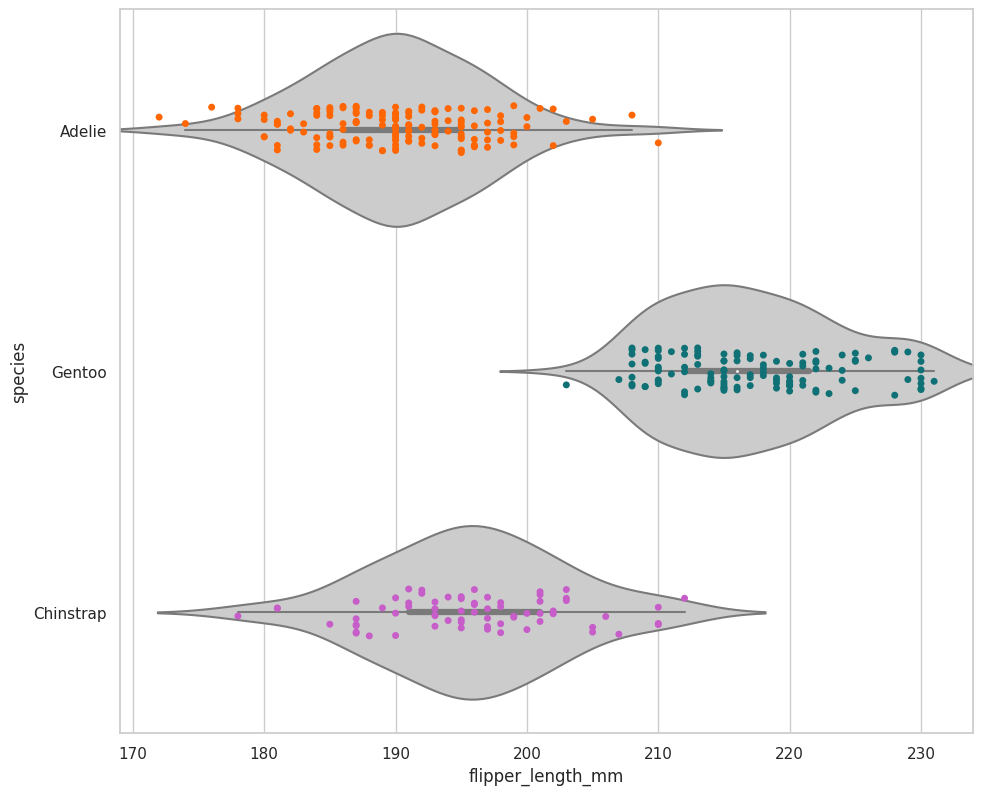

In [121]:
ax = sns.violinplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    y='species',
    color='.8'
)

ax = sns.stripplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    y='species',
    palette=penguin_color
)

<Axes: xlabel='species', ylabel='flipper_length_mm'>

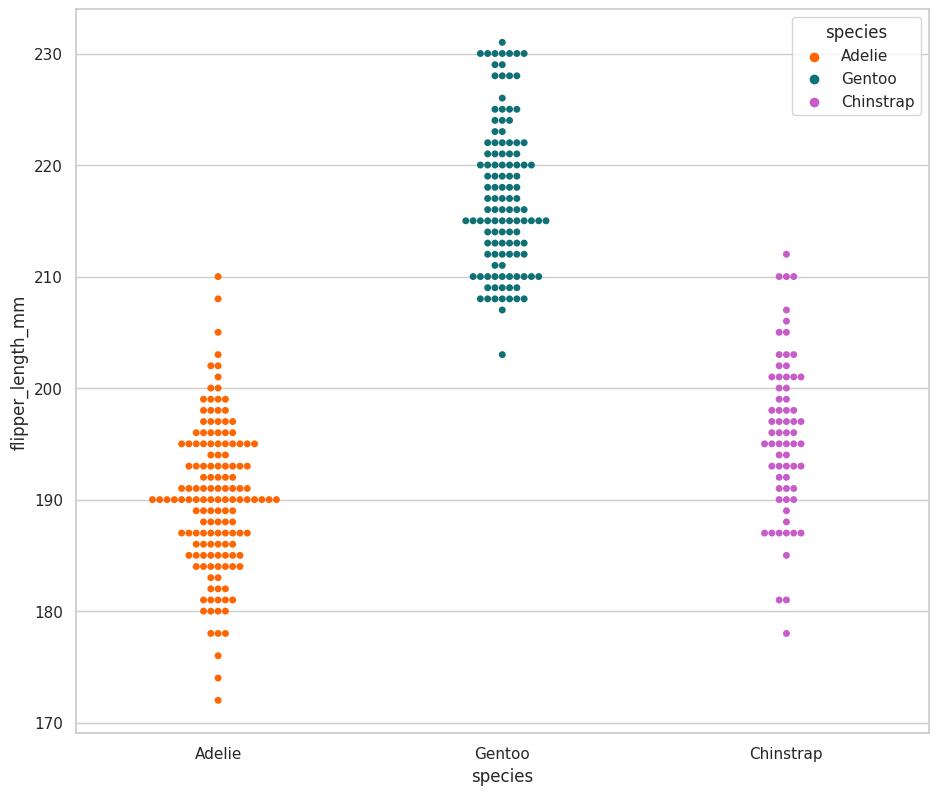

In [122]:
sns.swarmplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    hue='species',
    palette=penguin_color
)

## Matrices de correlación
Hasta qué punto las variables se relacionan entre sí, correlación no implica causalidad

### ¿Existe una correlación lineal entre alguna de nuestras variables?

In [124]:
processed_penguins_df.corr(numeric_only=True)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
bill_length_mm,1.000000,-0.228626,0.653096,0.589451,0.032657
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016,-0.048182
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979,0.151068
body_mass_g,0.589451,-0.472016,0.872979,1.000000,0.021862
year,0.032657,-0.048182,0.151068,0.021862,1.000000


### ¿Cómo puedo visualizar los coeficientes de correlación?

<Axes: >

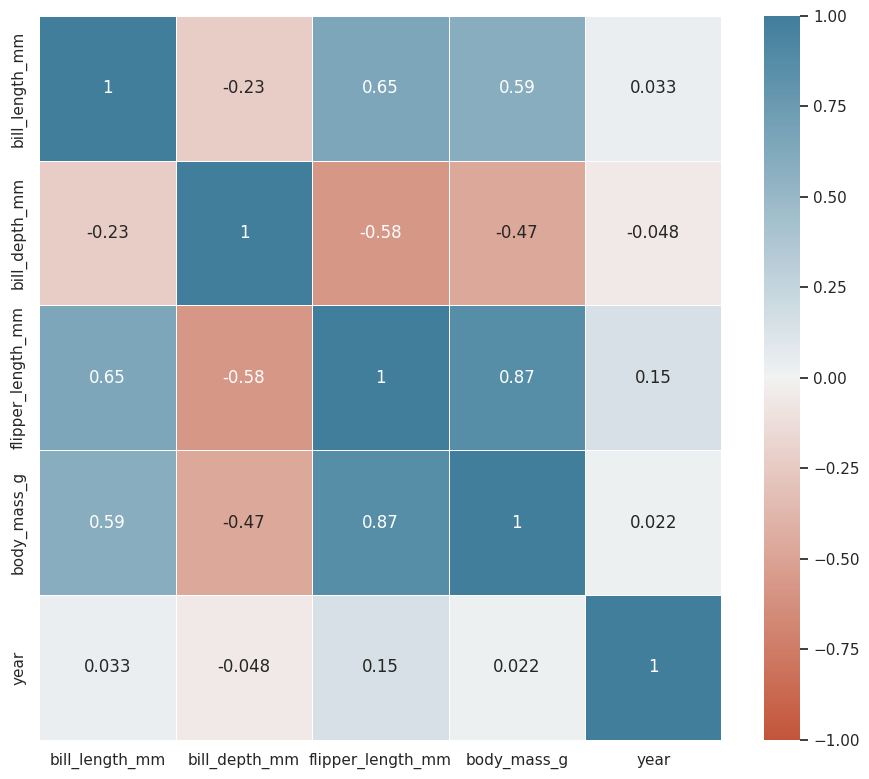

In [128]:
sns.heatmap(
    data=processed_penguins_df.corr(numeric_only=True),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot=True
)

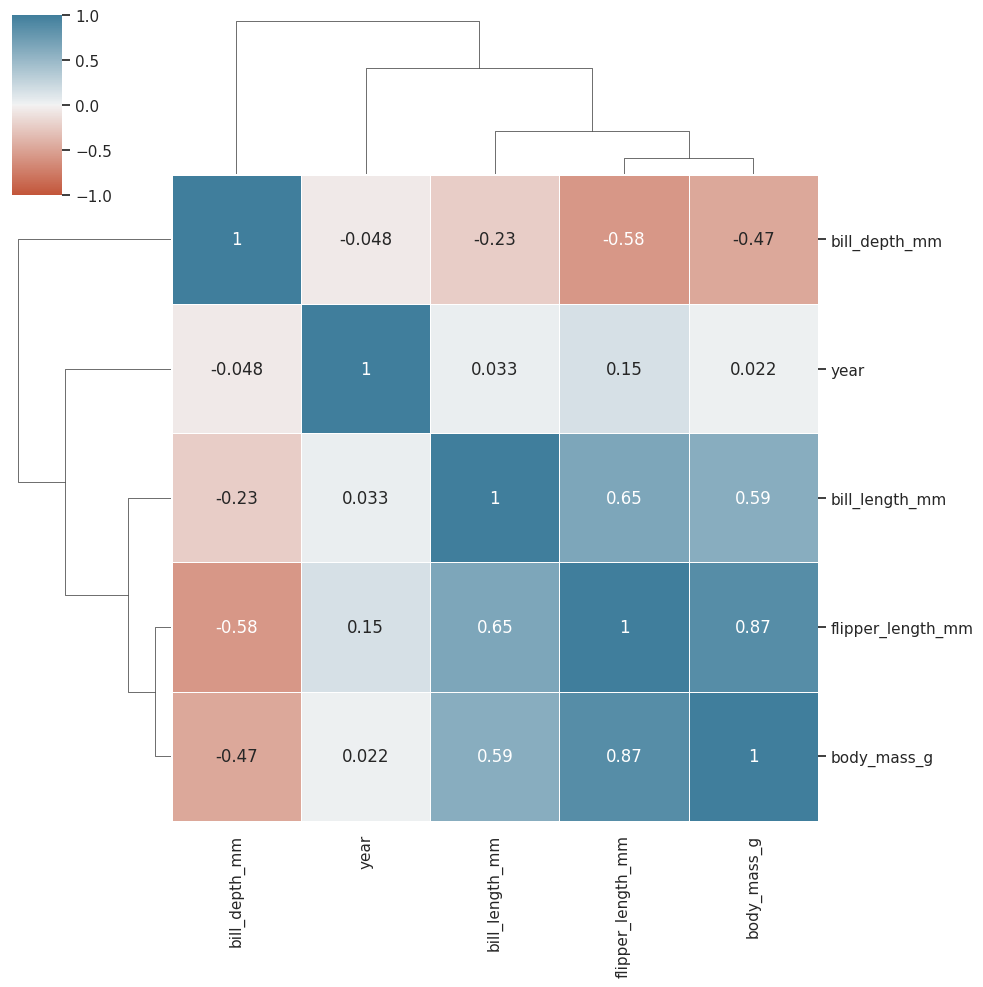

In [129]:
sns.clustermap(
    data=processed_penguins_df.corr(numeric_only=True),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot=True
)

### ¿Cómo podría representar una variable categórica como numérica discreta?

In [131]:
#se agrega columna con valores binarios de hembra y macho
processed_penguins_df = (
    processed_penguins_df
    .assign(
        numeric_sex=lambda df: df.sex.replace(['female', 'male'], [0, 1])
    )
)

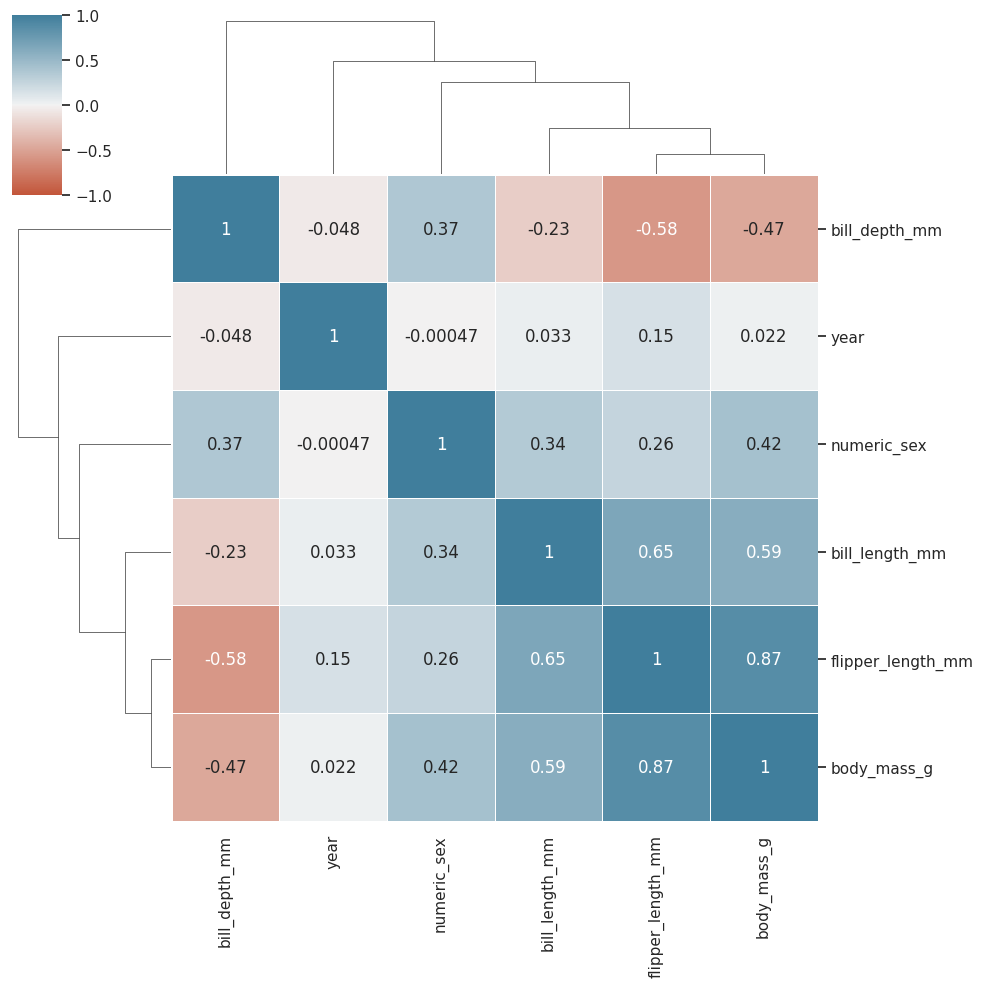

In [132]:
sns.clustermap(
    data=processed_penguins_df.corr(numeric_only=True),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot=True
)

## ¿Cuáls son algunas limitantes de coeficientes de correlación lineal?

### Solo nos ayuda a determinar la posible existencia de una correlación lineal; sin embargo, su ausencia no significa que no exista otro tipo de correlación

array([[1.        , 0.02393121],
       [0.02393121, 1.        ]])

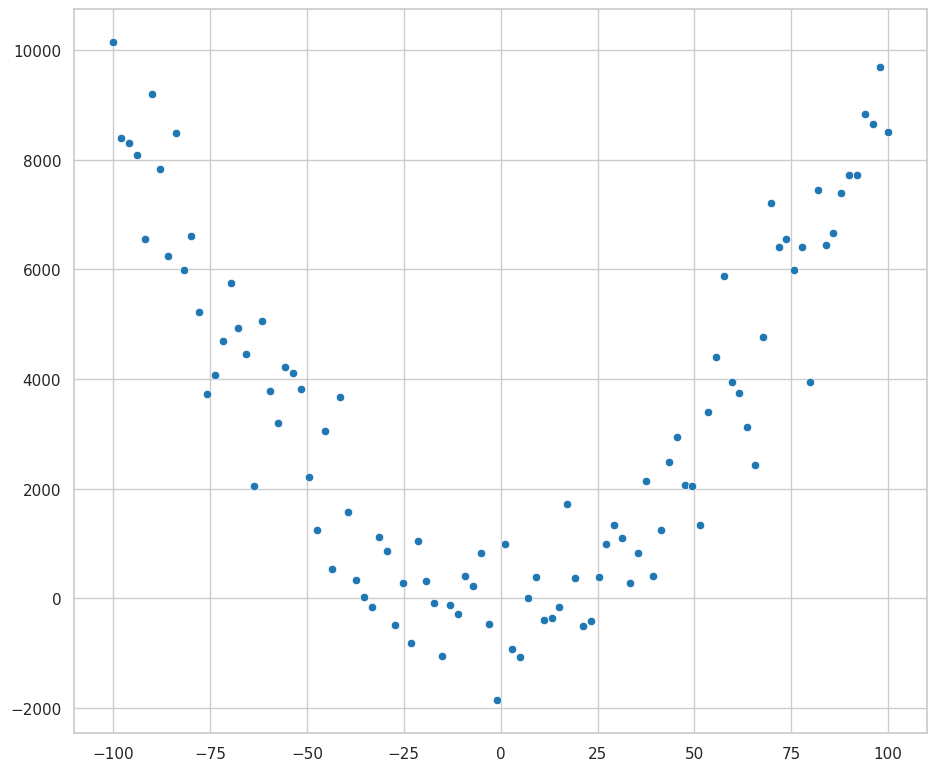

In [134]:
x = np.linspace(-100, 100, 100)
y = x**2
y += np.random.normal(0, 1000, x.size)

sns.scatterplot(
    x = x,
    y = y
)

np.corrcoef(x, y)

Aunque el coeficiente sea alto, no significa que tengan una relación lineal, como se ve a continuación

array([[1.        , 0.91667312],
       [0.91667312, 1.        ]])

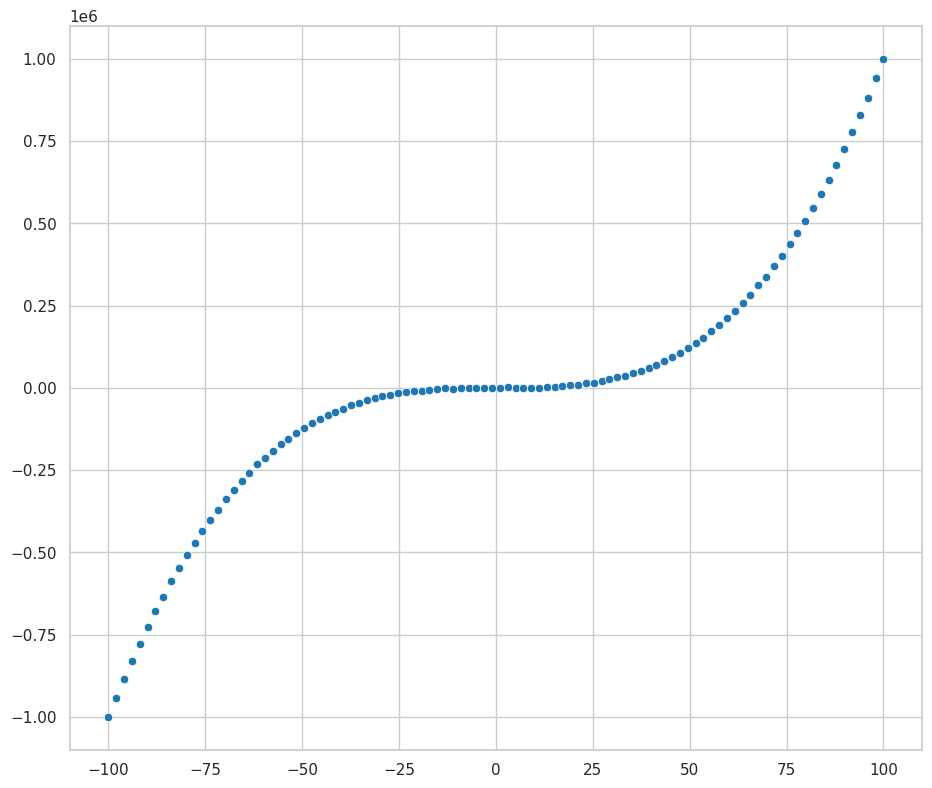

In [135]:
x = np.linspace(-100, 100, 100)
y = x**3
y += np.random.normal(0, 1000, x.size)

sns.scatterplot(
    x = x,
    y = y
)

np.corrcoef(x, y)

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

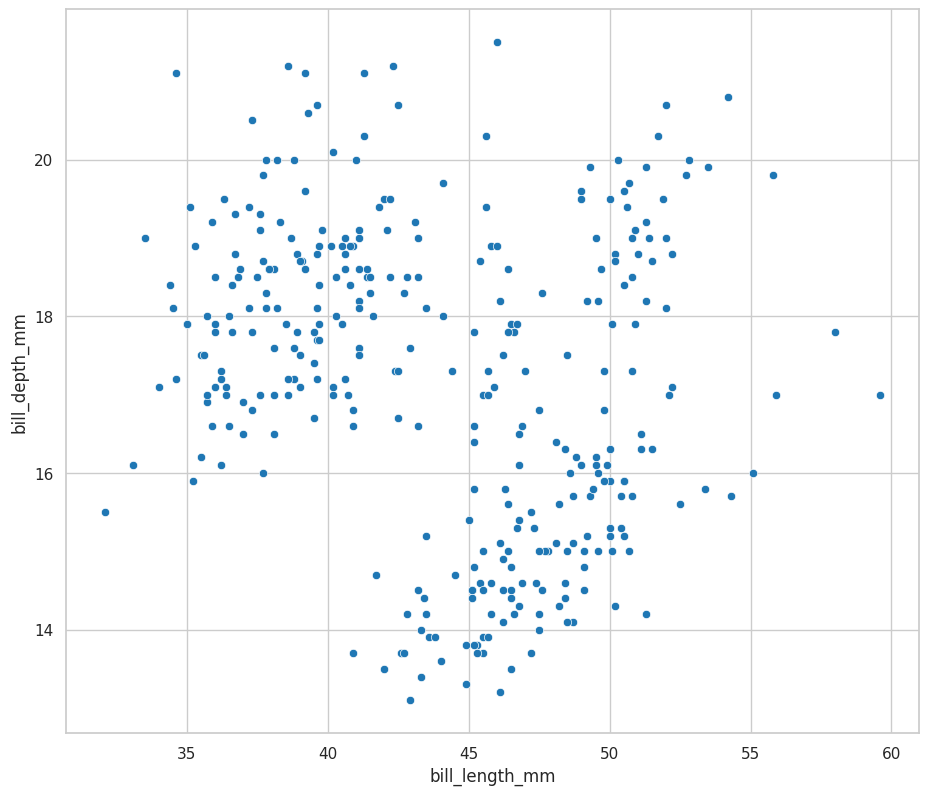

In [136]:
sns.scatterplot(
    data = processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm'
)

### El coeficiente de correlación no nos habla del impacto de la relación

[[1.         0.92761617]
 [0.92761617 1.        ]]
[[1.         0.67476343]
 [0.67476343 1.        ]]


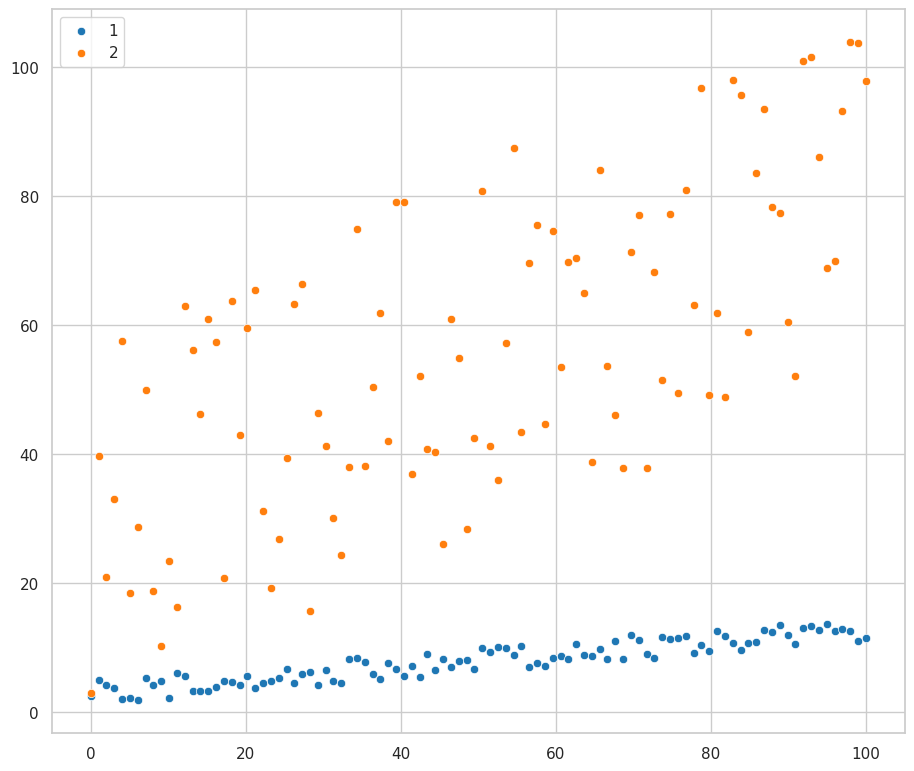

In [137]:
np.random.seed(42)
x_1 = np.linspace(0, 100, 100)
y_1 = 0.1 * x_1 + 3 + np.random.uniform(-2, 2, size= x_1.size)

sns.scatterplot(
    x = x_1,
    y = y_1
)

x_2 = np.linspace(0, 100, 100)
y_2 = 0.5 * x_2 + 1 + np.random.uniform(0, 60, size=x_2.size)

sns.scatterplot(
    x = x_2,
    y = y_2
)

plt.legend(labels=['1', '2'])

print(np.corrcoef(x_1, y_1))
print(np.corrcoef(x_2, y_2))

## Estableciendo relaciones: Análisis de regresión simple

In [138]:
res_1 = scipy.stats.linregress(x=x_1, y=y_1)
res_2 = scipy.stats.linregress(x=x_2, y=y_2)

print(res_1, res_2, sep='\n')

LinregressResult(slope=0.10081969280979615, intercept=2.8397383330230292, rvalue=0.9276161661149585, pvalue=1.0607043467839354e-43, stderr=0.004101050284084736, intercept_stderr=0.2373714102742458)
LinregressResult(slope=0.5470008424819226, intercept=28.519861265205236, rvalue=0.6747634267657527, pvalue=1.388369987899253e-14, stderr=0.06043657503136455, intercept_stderr=3.498107570885824)


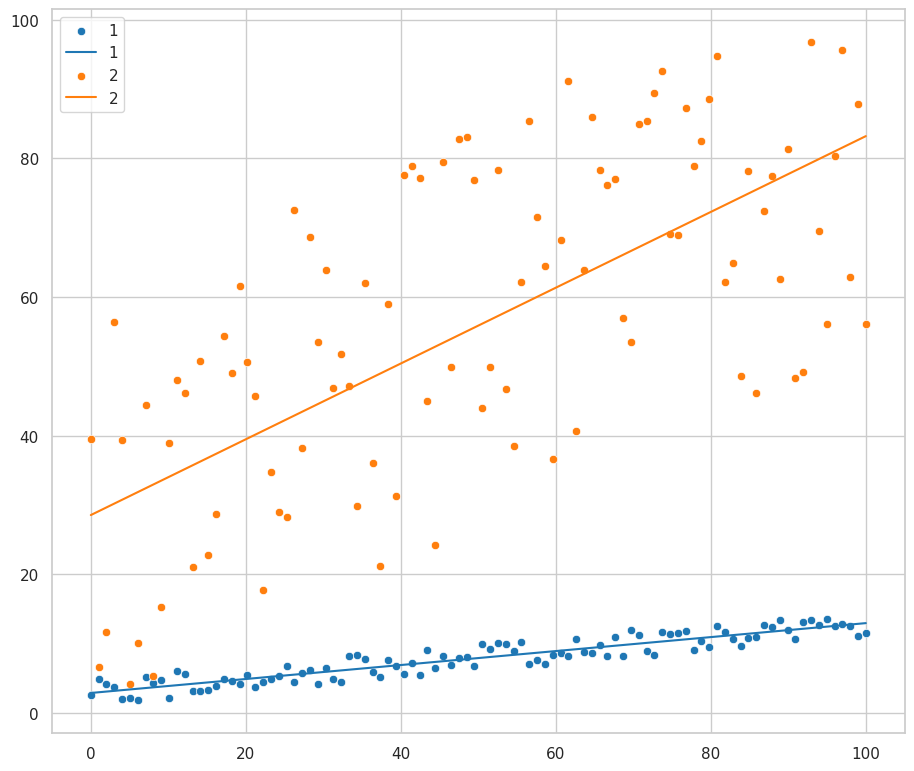

In [139]:
sns.scatterplot(
    x = x_1,
    y = y_1
)
fx_1 = np.array([x_1.min(), x_1.max()])
fy_1 = res_1.intercept + res_1.slope * fx_1

x_2 = np.linspace(0, 100, 100)
y_2 = 0.5 * x_2 + 1 + np.random.uniform(0, 60, size=x_2.size)

plt.plot(fx_1, fy_1)

sns.scatterplot(
    x = x_2,
    y = y_2
)
fx_2 = np.array([x_2.min(), x_2.max()])
fy_2 = res_2.intercept + res_2.slope * fx_2

plt.plot(fx_2, fy_2)

plt.legend(labels=['1', '1', '2', '2'])

LinregressResult(slope=-0.08232675339862275, intercept=20.786648668433827, rvalue=-0.22862563591302898, pvalue=2.5282897209443435e-05, stderr=0.019268346735778864, intercept_stderr=0.8541730787409804)


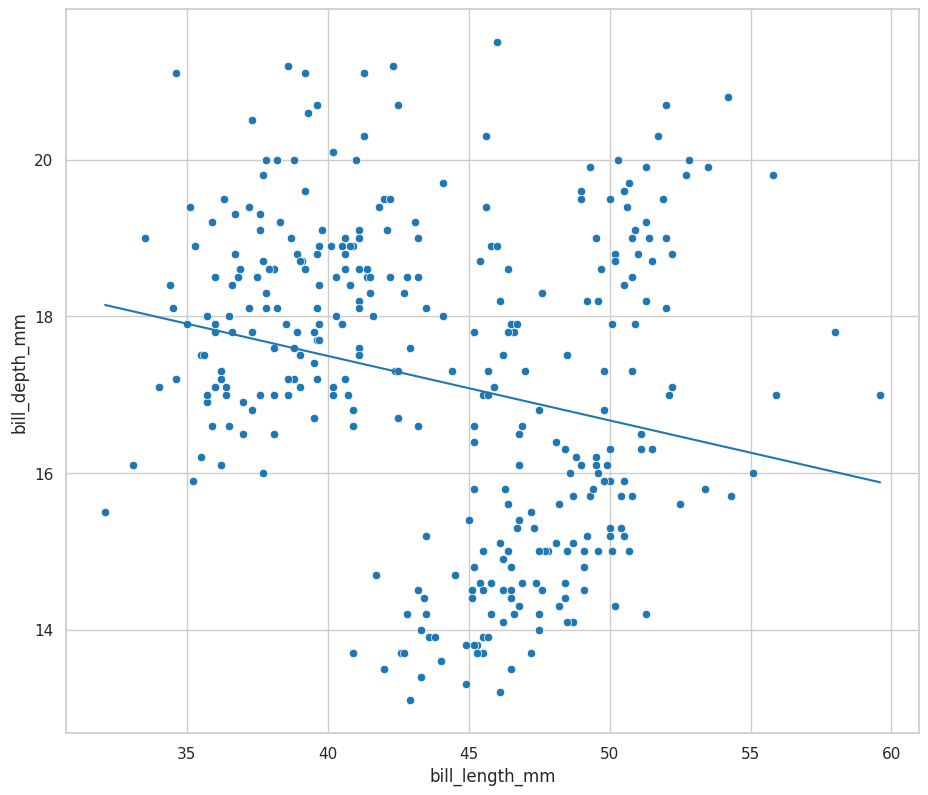

In [141]:
sns.scatterplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm'
)

res_penguins= scipy.stats.linregress(
    x=processed_penguins_df.bill_length_mm,
    y=processed_penguins_df.bill_depth_mm
)

print(res_penguins)

fx_1 = np.array([processed_penguins_df.bill_length_mm.min(), processed_penguins_df.bill_length_mm.max()])
fy_1 = res_penguins.intercept + res_penguins.slope * fx_1

plt.plot(fx_1, fy_1)

### Regresión lineal con seaborn

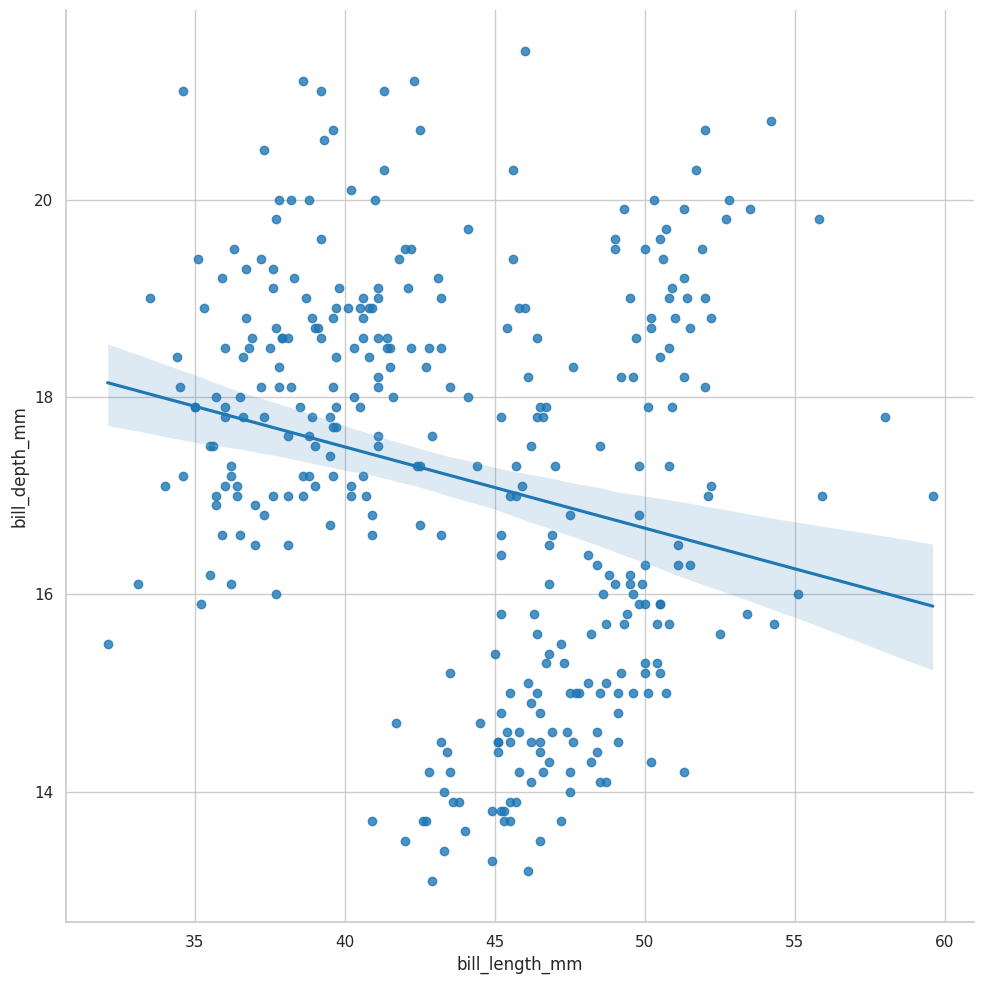

In [144]:
sns.lmplot(
    data= processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    height=10
)

Al tener en cuenta las especies, la regresión lineal cambia totalmente

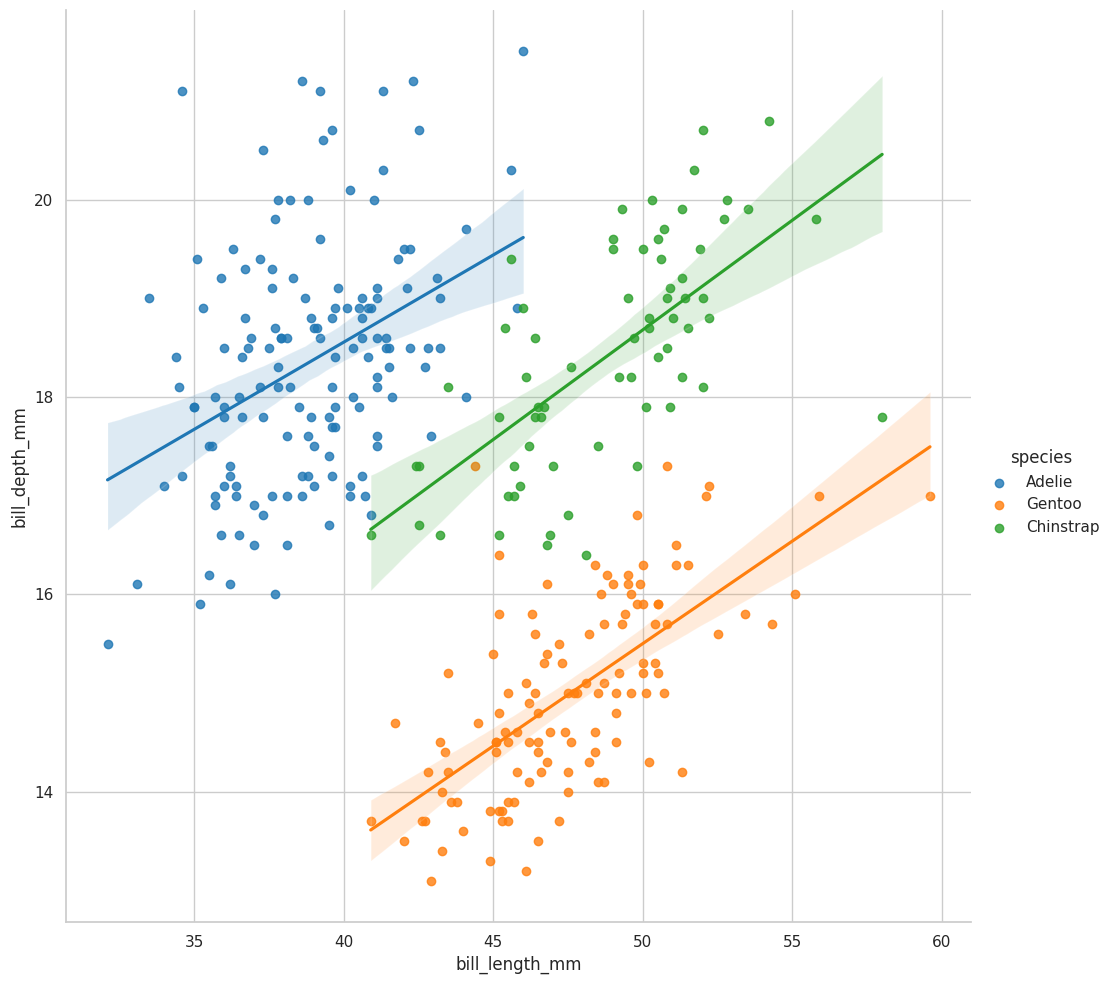

In [143]:
sns.lmplot(
    data= processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    height=10,
    hue='species'
)

## Limitaciones de la regresión lineal simple
* La regresión lineal simple de A - B no es lo mismo que de B -A, no es simétrica
* Si dos variables crecen o decrecen siguiendo las mismas pautas, no implica necesariamente que una cause la otra
* Solo puede manejar relaciones lineales

### La regresión lineal simple no es simétrica

0      39.1
1      39.5
2      40.3
4      36.7
5      39.3
       ... 
339    55.8
340    43.5
341    49.6
342    50.8
343    50.2
Name: bill_length_mm, Length: 333, dtype: float64

In [150]:
x = processed_penguins_df.bill_length_mm
y = processed_penguins_df.bill_depth_mm

res_x_y = scipy.stats.linregress(x=x, y=y)
res_y_x = scipy.stats.linregress(x=y, y=x)

print(res_x_y, res_y_x, sep='\n')

LinregressResult(slope=-0.08232675339862275, intercept=20.786648668433827, rvalue=-0.22862563591302898, pvalue=2.5282897209443435e-05, stderr=0.019268346735778864, intercept_stderr=0.8541730787409804)
LinregressResult(slope=-0.6349051704195019, intercept=54.89085424504755, rvalue=-0.22862563591302898, pvalue=2.5282897209443435e-05, stderr=0.1485977821662331, intercept_stderr=2.5673415135382553)


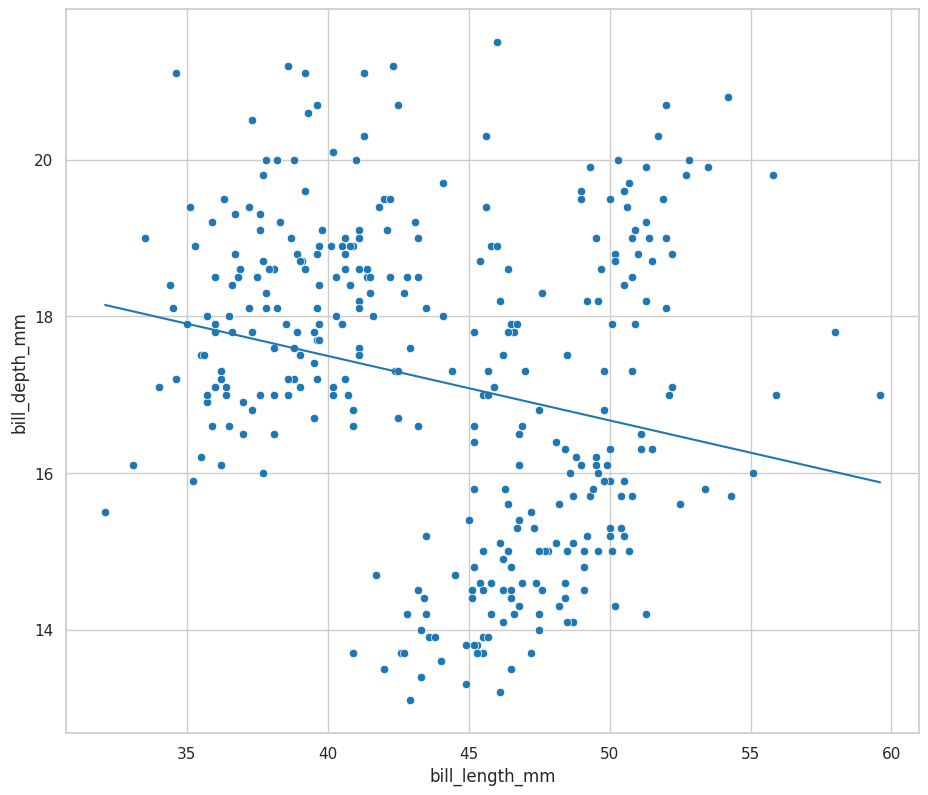

In [152]:
sns.scatterplot(
    x=x,
    y=y
)

fx_1 = np.array([x.min(), x.max()])
fy_1 = res_x_y.intercept + res_x_y.slope * fx_1

plt.plot(fx_1, fy_1)

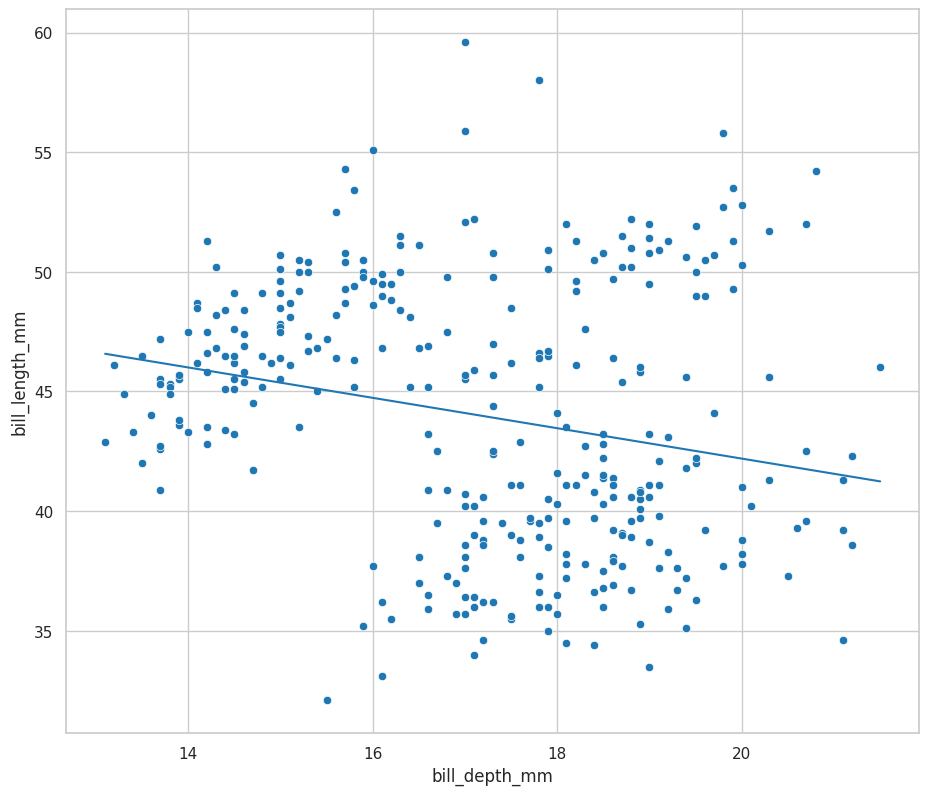

In [154]:
sns.scatterplot(
    x=y,
    y=x
)

fx_2 = np.array([y.min(), y.max()])
fy_2 = res_y_x.intercept + res_y_x.slope * fx_2

plt.plot(fx_2, fy_2)

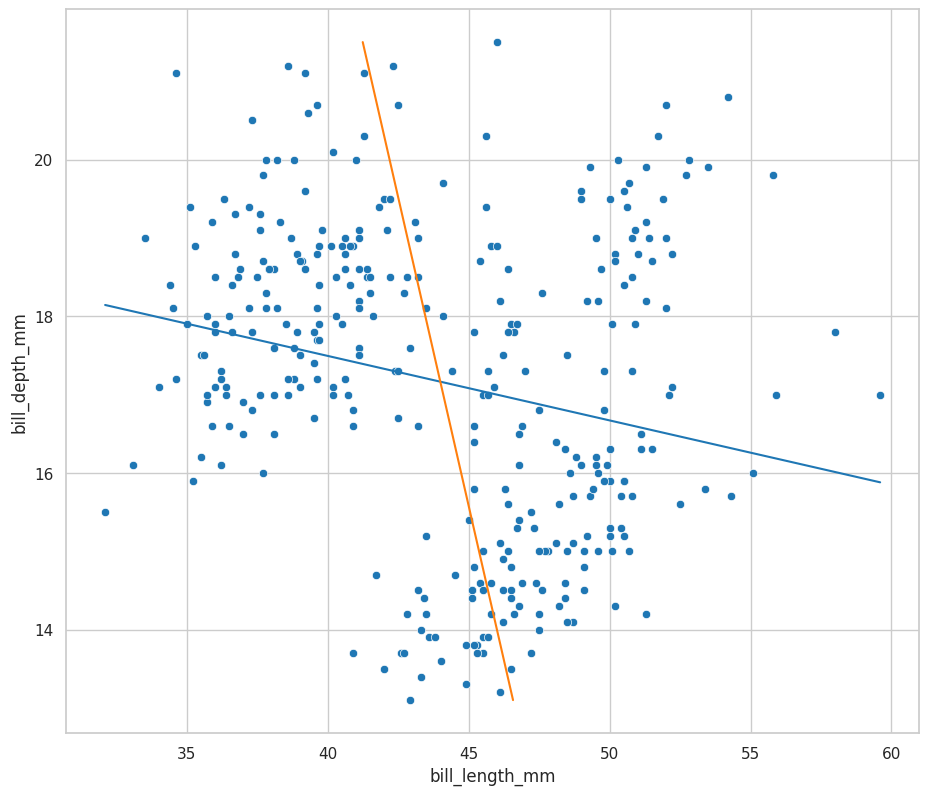

In [156]:
sns.scatterplot(
    x=x,
    y=y
)

plt.plot(fx_1, fy_1)
plt.plot(fy_2, fx_2)


### La regresión no nos dice nada sobre la causalidad, pero existen herramientas para separar las relaciones entre múltiples variables

In [159]:
(
    smf.ols(
        formula='bill_length_mm ~ bill_depth_mm', # la parte a la derecha de la berbulilla es la x y la izquierda es la y
        data=processed_penguins_df
    )
    .fit() #ajuste a modelo
    .params #para obtener parametros de ajuste del modelo
)

Intercept        54.890854
bill_depth_mm    -0.634905
dtype: float64

In [160]:
(
    smf.ols(
        formula='bill_depth_mm ~ bill_length_mm', # la parte a la derecha de la berbulilla es la x y la izquierda es la y
        data=processed_penguins_df
    )
    .fit() #ajuste a modelo
    .params #para obtener parametros de ajuste del modelo
)

Intercept         20.786649
bill_length_mm    -0.082327
dtype: float64

## Análisis de regresión múltiple

### Olvidé mi báscula para pesar a los pingüinos, ¿Cuál sería la mejor forma de capturar ese dato?

#### Creando modelos

##### Modelo 1
Regresión lineal peso del pingüino vs longitud de pico

In [162]:
model_1 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm',
        data = processed_penguins_df        
    )
    .fit()
)

model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     176.2
Date:                Sat, 10 Jun 2023   Prob (F-statistic):           1.54e-32
Time:                        16:33:31   Log-Likelihood:                -2629.1
No. Observations:                 333   AIC:                             5262.
Df Residuals:                     331   BIC:                             5270.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        388.8452    289.817      1.342      0.181    -181.271     958.961
bill_length_mm    86.7918      6.538     13.276      0.000      73.931      99.652
==============================================================================
Omnibus:                        6.141   Durbin-Watson:                   0.849
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                4.899
Skew:                          -0.197   Prob(JB):                       0.0864
Kurtosis:                       2.555   Cond. No.                         360.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Modelo 2
Regresión lineal peso de pingüino vs longitud y grosor de pico

In [163]:
model_2 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm + bill_depth_mm',
        data = processed_penguins_df        
    )
    .fit()
)

model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     144.8
Date:                Sat, 10 Jun 2023   Prob (F-statistic):           7.04e-46
Time:                        16:36:41   Log-Likelihood:                -2595.2
No. Observations:                 333   AIC:                             5196.
Df Residuals:                     330   BIC:                             5208.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3413.4519    437.911      7.795      0.000    2552.002    4274.902
bill_length_mm    74.8126      6.076     12.313      0.000      62.860      86.765
bill_depth_mm   -145.5072     16.873     -8.624      0.000    -178.699    -112.315
==============================================================================
Omnibus:                        2.839   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.242   Jarque-Bera (JB):                2.175
Skew:                          -0.000   Prob(JB):                        0.337
Kurtosis:                       2.604   Cond. No.                         644.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Modelo 3

In [164]:
model_3 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm',
        data = processed_penguins_df        
    )
    .fit()
)

model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     354.9
Date:                Sat, 10 Jun 2023   Prob (F-statistic):          9.26e-103
Time:                        16:38:22   Log-Likelihood:                -2459.8
No. Observations:                 333   AIC:                             4928.
Df Residuals:                     329   BIC:                             4943.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6445.4760    566.130    -11.385      0.000   -7559.167   -5331.785
bill_length_mm        3.2929      5.366      0.614      0.540      -7.263      13.849
bill_depth_mm        17.8364     13.826      1.290      0.198      -9.362      45.035
flipper_length_mm    50.7621      2.497     20.327      0.000      45.850      55.675
==============================================================================
Omnibus:                        5.596   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                5.469
Skew:                           0.312   Prob(JB):                       0.0649
Kurtosis:                       3.068   Cond. No.                     5.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Modelo 4

In [165]:
model_4 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm + C(sex)',
        data = processed_penguins_df        
    )
    .fit()
)

model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     381.3
Date:                Sat, 10 Jun 2023   Prob (F-statistic):          6.28e-122
Time:                        18:21:06   Log-Likelihood:                -2411.8
No. Observations:                 333   AIC:                             4834.
Df Residuals:                     328   BIC:                             4853.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2288.4650    631.580     -3.623      0.000   -3530.924   -1046.006
C(sex)[T.male]      541.0285     51.710     10.463      0.000     439.304     642.753
bill_length_mm       -2.3287      4.684     -0.497      0.619     -11.544       6.886
bill_depth_mm       -86.0882     15.570     -5.529      0.000    -116.718     -55.459
flipper_length_mm    38.8258      2.448     15.862      0.000      34.011      43.641
==============================================================================
Omnibus:                        2.598   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.273   Jarque-Bera (JB):                2.125
Skew:                           0.062   Prob(JB):                        0.346
Kurtosis:                       2.629   Cond. No.                     7.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Modelo 5

In [167]:
model_5 = (
    smf.ols(
        formula='body_mass_g ~ flipper_length_mm + C(sex)',
        data=processed_penguins_df
    )
    .fit()
)

model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     684.8
Date:                Sat, 10 Jun 2023   Prob (F-statistic):          3.53e-118
Time:                        18:25:02   Log-Likelihood:                -2427.2
No. Observations:                 333   AIC:                             4860.
Df Residuals:                     330   BIC:                             4872.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5410.3002    285.798    -18.931      0.000   -5972.515   -4848.085
C(sex)[T.male]      347.8503     40.342      8.623      0.000     268.491     427.209
flipper_length_mm    46.9822      1.441     32.598      0.000      44.147      49.817
==============================================================================
Omnibus:                        0.262   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.877   Jarque-Bera (JB):                0.376
Skew:                           0.051   Prob(JB):                        0.829
Kurtosis:                       2.870   Cond. No.                     2.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Análisis de regresión múltiple, comparación y visualización de resultados

### Creación de tabla de resultados

array([[<Axes: title={'center': 'valor_actual'}>,
        <Axes: title={'center': 'prediccion_modelo_1'}>],
       [<Axes: title={'center': 'prediccion_modelo_2'}>,
        <Axes: title={'center': 'prediccion_modelo_3'}>],
       [<Axes: title={'center': 'prediccion_modelo_4'}>,
        <Axes: title={'center': 'prediccion_modelo_5'}>]], dtype=object)

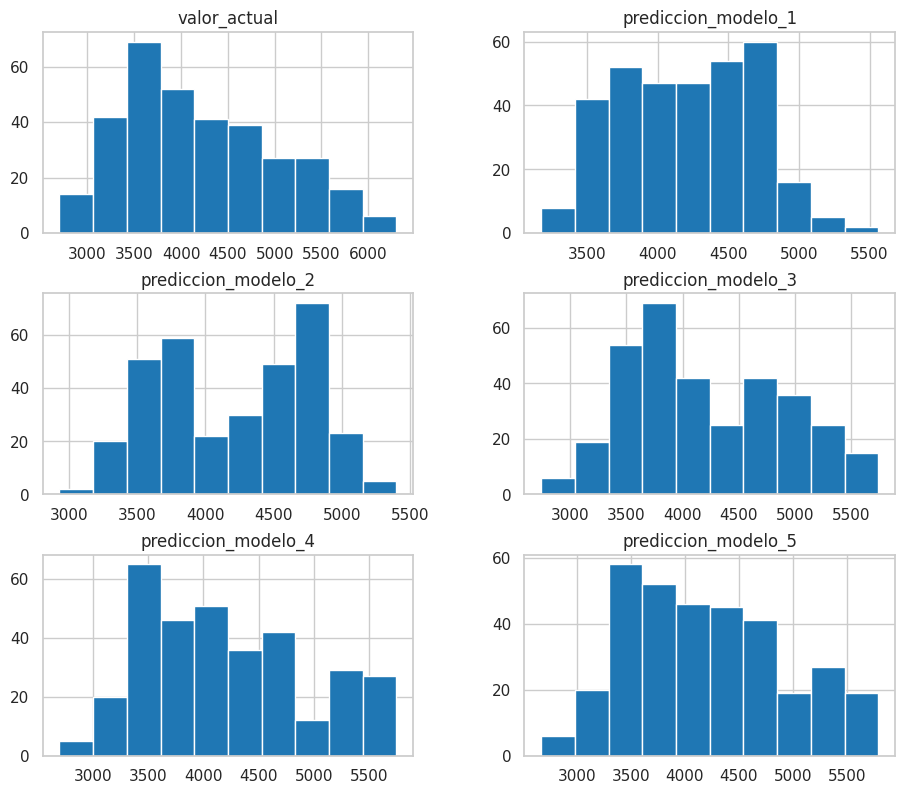

In [169]:
resultado_modelos = pd.DataFrame(
    dict(
        valor_actual=processed_penguins_df.body_mass_g,
        prediccion_modelo_1 = model_1.predict(),
        prediccion_modelo_2 = model_2.predict(),
        prediccion_modelo_3 = model_3.predict(),
        prediccion_modelo_4 = model_4.predict(),
        prediccion_modelo_5 = model_5.predict(),
        species = processed_penguins_df.species,
        sex = processed_penguins_df.sex
    )
)

resultado_modelos.hist()

### ECDFs

<Axes: ylabel='Proportion'>

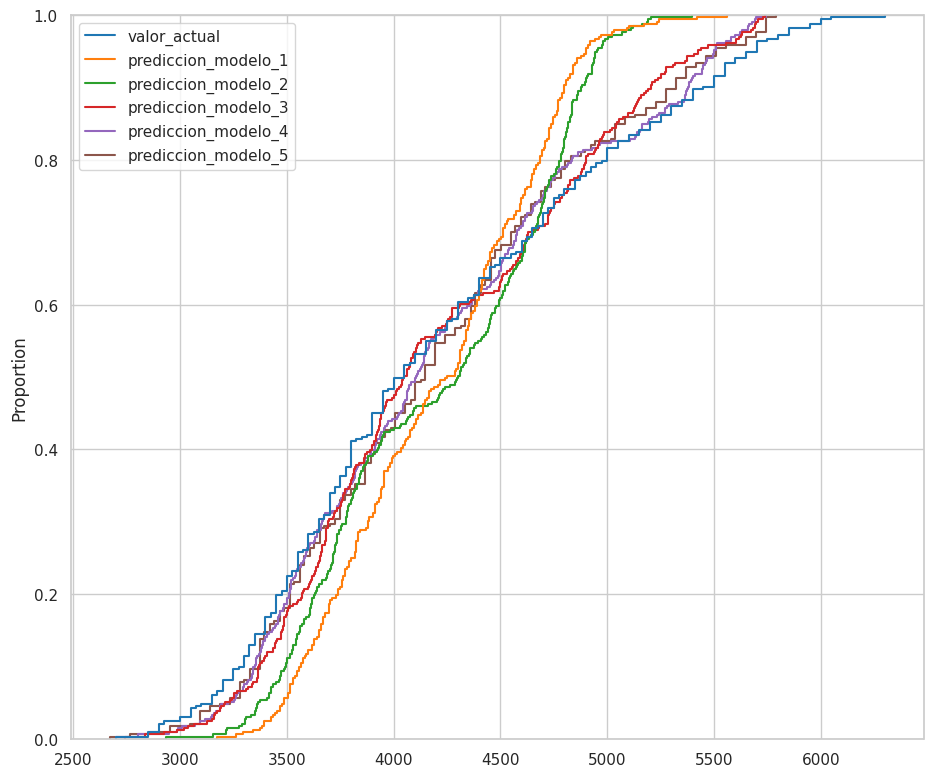

In [170]:
sns.ecdfplot(
    data = resultado_modelos
)

<Axes: ylabel='Proportion'>

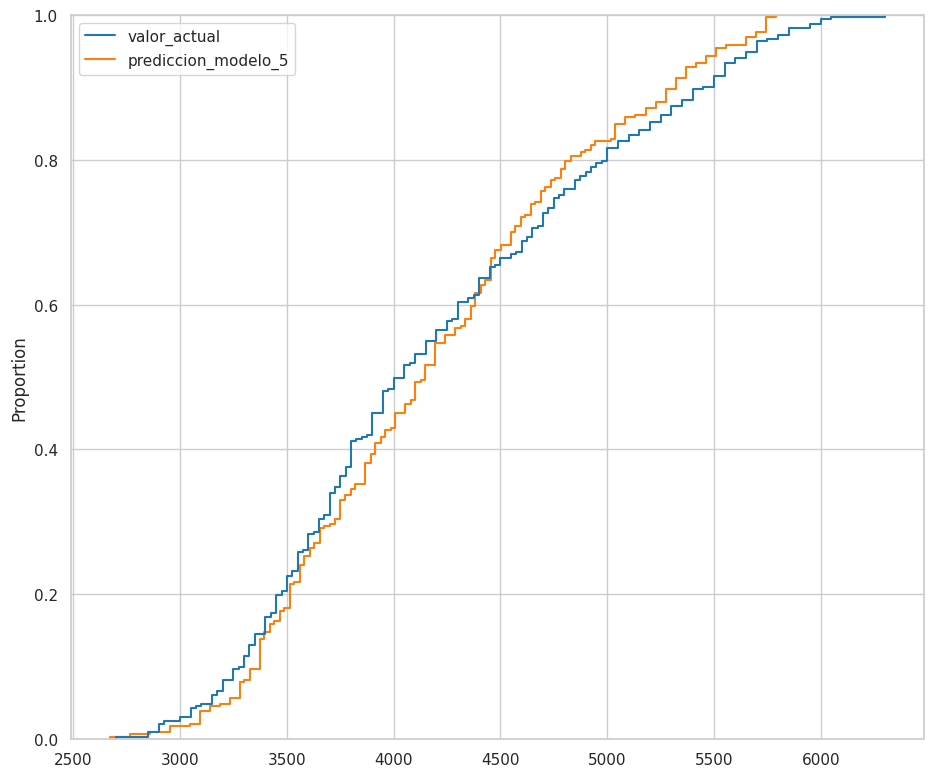

In [171]:
sns.ecdfplot(
    data = resultado_modelos.select_columns(['valor_actual', 'prediccion_modelo_5'])
)


### PDFs

<Axes: ylabel='Density'>

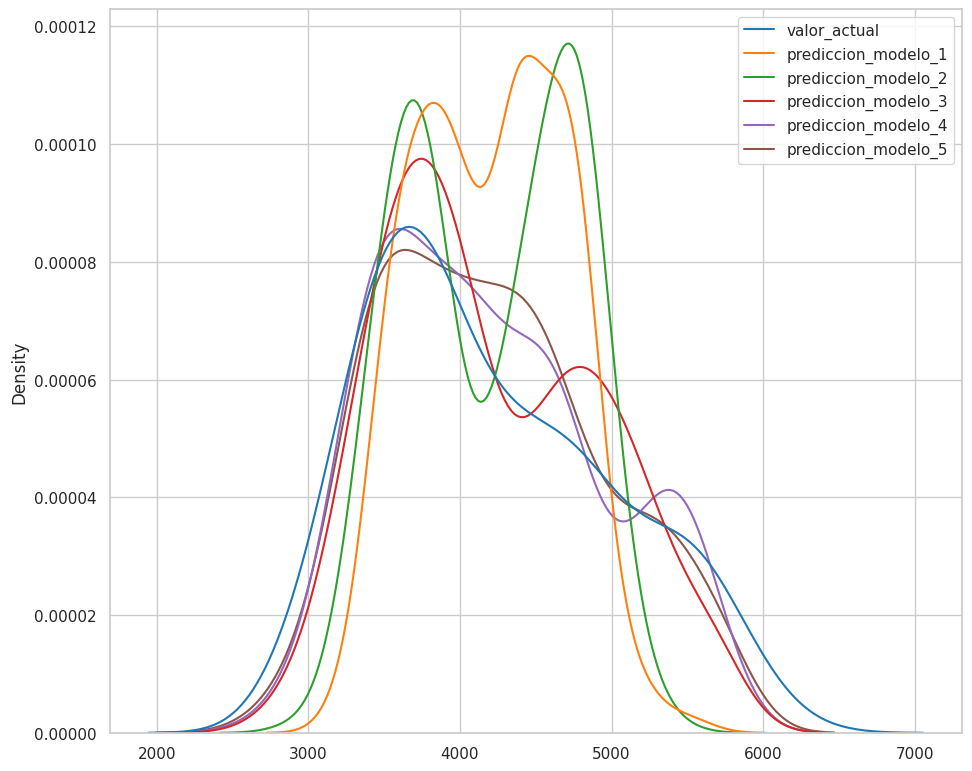

In [172]:
sns.kdeplot(
    data=resultado_modelos
)


<Axes: ylabel='Density'>

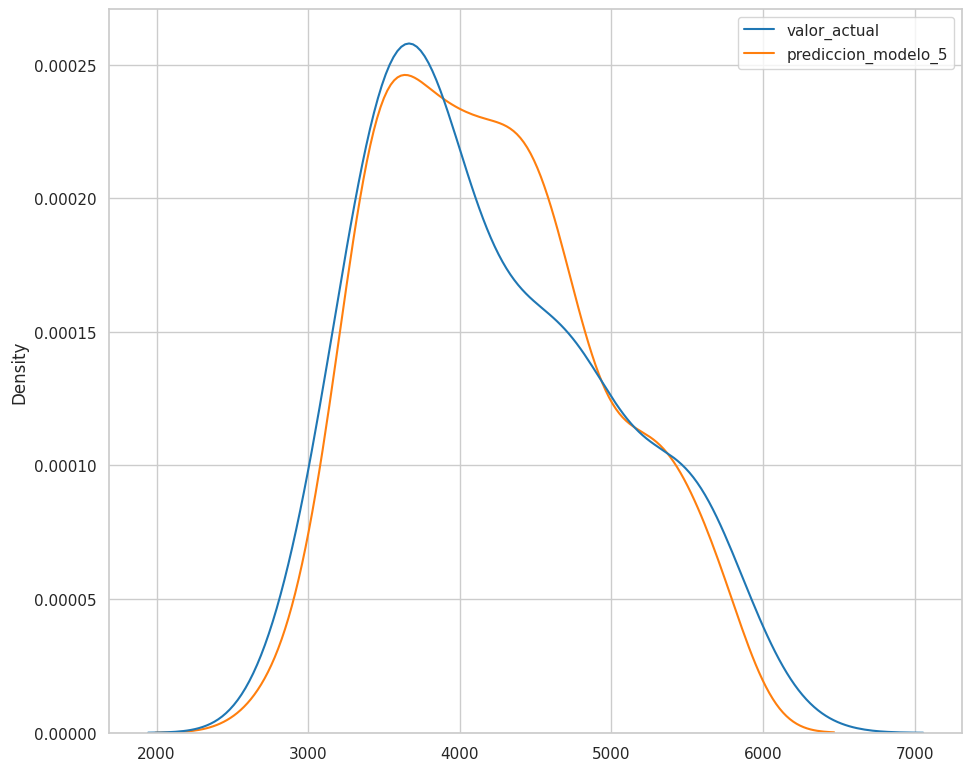

In [174]:
sns.kdeplot(
    data=resultado_modelos.select_columns(['valor_actual', 'prediccion_modelo_5'])
)


### ¿Qué pudimos haber encontrado antes de hacer los modelos?

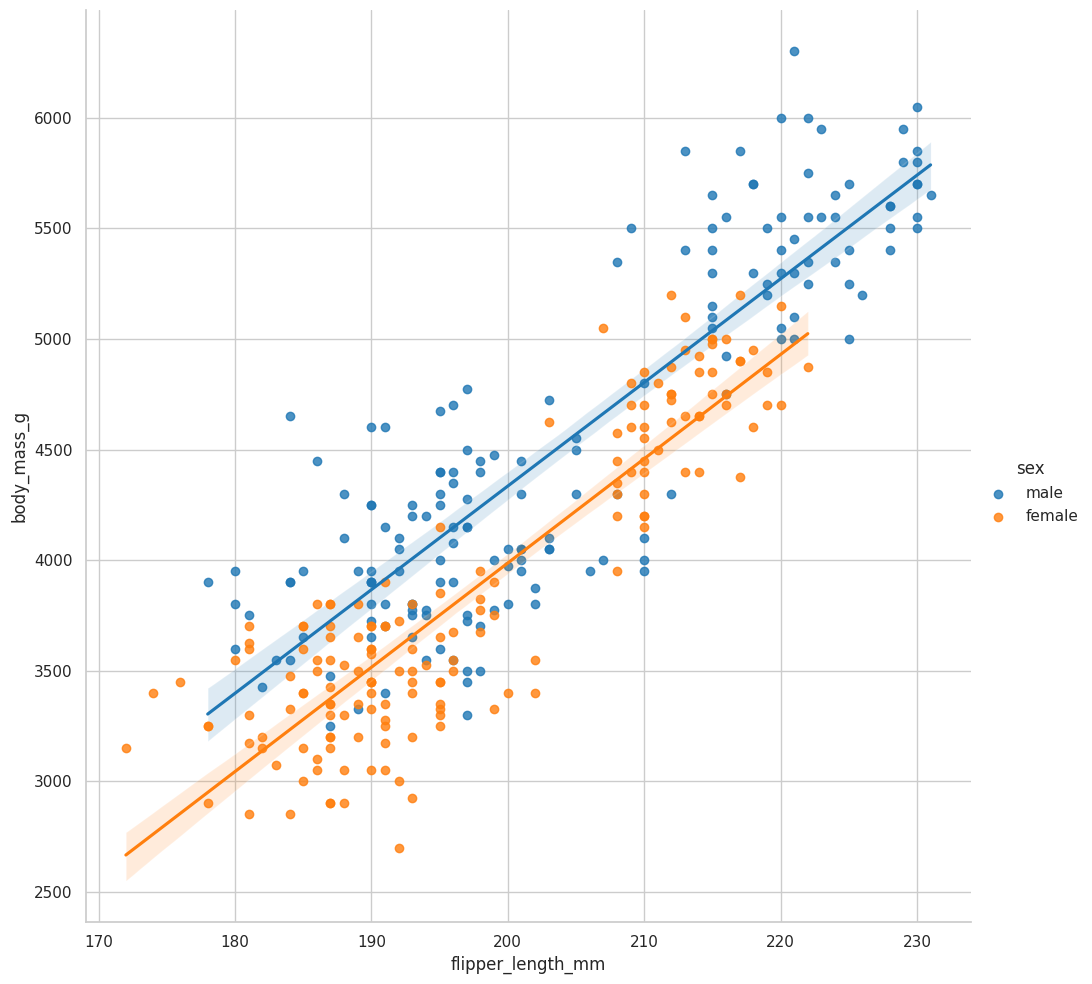

In [181]:
sns.lmplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    y='body_mass_g',
    hue='sex',
    height=10
)

## Análisis de regresión logística
positivo mayor probabilidad de que algo suceda, negativo menor probabilidad de que algo suceda

### ¿Podemos crear un modelo que nos ayude a definir si un pingüino es macho o hembra?

In [182]:
smf.logit(
    formula='numeric_sex ~ flipper_length_mm + bill_length_mm + bill_depth_mm + C(island)',
    data=processed_penguins_df
).fit().summary()

Optimization terminated successfully.
         Current function value: 0.360900
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            numeric_sex   No. Observations:                  333
Model:                          Logit   Df Residuals:                      327
Method:                           MLE   Df Model:                            5
Date:                Sat, 10 Jun 2023   Pseudo R-squ.:                  0.4793
Time:                        19:19:58   Log-Likelihood:                -120.18
converged:                       True   LL-Null:                       -230.80
Covariance Type:            nonrobust   LLR p-value:                 8.021e-46
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -61.4464      6.944     -8.849      0.000     -75.057     -47.836
C(island)[T.Dream]        -1.5596      0.493     -3.163      0.002      -2.526      -0.593
C(island)[T.Torgersen]    -1.0323      0.599     -1.725      0.085      -2.205       0.141
flipper_length_mm          0.1393      0.024      5.874      0.000       0.093       0.186
bill_length_mm             0.1413      0.045      3.150      0.002       0.053       0.229
bill_depth_mm              1.6401      0.185      8.864      0.000       1.277       2.003
==========================================================================================
"""

Como la isla Biscoe no aparece en los resultados, significa que es la que se tomó de comparación, la interpretación en este caso es que es menos probable tener un pingüino macho en la isla Dream que en la Biscoe, y también es menos probable encontrar un macho en la isla Torgersen que en la Biscoe

In [183]:
processed_penguins_df.island.unique()


array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

Para comparar las islas Dream y Torgersen, se debe restar el resutlado de la isla Dream al de la Torgersen, como se muestra en la siguiente celda

In [184]:
-1.5596 - (-1.0323)

-0.5273000000000001

El resultado muestra que es más probable encontrar machos en Dream que en Torgersen

### Exploración de nuestras variables categóricas

In [185]:
(
    processed_penguins_df
    .value_counts(['island', 'sex'])
    .reset_index(name='conteos')
)

,island,sex,conteos
0,Biscoe,male,83
1,Biscoe,female,80
2,Dream,male,62
3,Dream,female,61
4,Torgersen,female,24
5,Torgersen,male,23


De la exploración de las variables categóricas vemos que desde los datos procesados hay más machos en la isla Biscoe, por tanto el modelo que hicimos antes puede estar sesgado

### ¿Podemos definir un modelo que nos ayude a identificar si un pingüino pertenece a determinada especie?

In [186]:
preprocess_penguins_df.species.unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [187]:
processed_penguins_df = (
    processed_penguins_df
    .assign(is_adelie=lambda df: df.species.replace(['Adelie', 'Gentoo', 'Chinstrap'], [1, 0, 0])) # se pone 1 si es Adelie y 0 si no es
)


In [189]:
model_is_adelie = smf.logit(
    formula= 'is_adelie ~ flipper_length_mm + C(sex)',
    data=processed_penguins_df
).fit()

model_is_adelie.params

Optimization terminated successfully.
         Current function value: 0.355225
         Iterations 8


Intercept            40.568368
C(sex)[T.male]        1.282656
flipper_length_mm    -0.209705
dtype: float64

Es más probable que un pingüino adelie sea macho a que sea hembra y es menos probable que tenga relación con la longitud del ala

In [190]:
is_adelie_df_predicctions = pd.DataFrame(
    dict(
        actual_adelie = processed_penguins_df.is_adelie,
        predicted_values = model_is_adelie.predict().round()
    )
)

is_adelie_df_predicctions

,actual_adelie,predicted_values
0,1,1.0
1,1,1.0
2,1,0.0
4,1,1.0
5,1,1.0
...,...,...
339,0,0.0
340,0,0.0
341,0,1.0
342,0,0.0


In [192]:
(
    is_adelie_df_predicctions
    .value_counts(['actual_adelie', 'predicted_values'])
    .reset_index(name='conteos')
)

,actual_adelie,predicted_values,conteos
0,0,0.0,151
1,1,1.0,129
2,0,1.0,36
3,1,0.0,17


Otra forma de ver los datos predicos es mediante una matriz de confusión

In [193]:
print(
    sklearn.metrics.confusion_matrix(
        is_adelie_df_predicctions.actual_adelie,
        is_adelie_df_predicctions.predicted_values
    )
)

sklearn.metrics.accuracy_score(
        is_adelie_df_predicctions.actual_adelie,
        is_adelie_df_predicctions.predicted_values
    )

[[151  36]
 [ 17 129]]


0.8408408408408409